# Лабораторная 1
## Рогозина 2321

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"lyubovrogozina","key":"6b3c859ffd5dcbb91751d66c96a7835e"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

## Импорт датасета

Датасет с данными по медстраховки. Ссылка на датасет: https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data . Я работаю в страховой компании (разработчиком), поэтому выбирала датасет со страхованием.

In [ ]:
! kaggle datasets download willianoliveiragibin/healthcare-insurance

Dataset URL: https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance
License(s): CC0-1.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/healthcare-insurance.zip")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


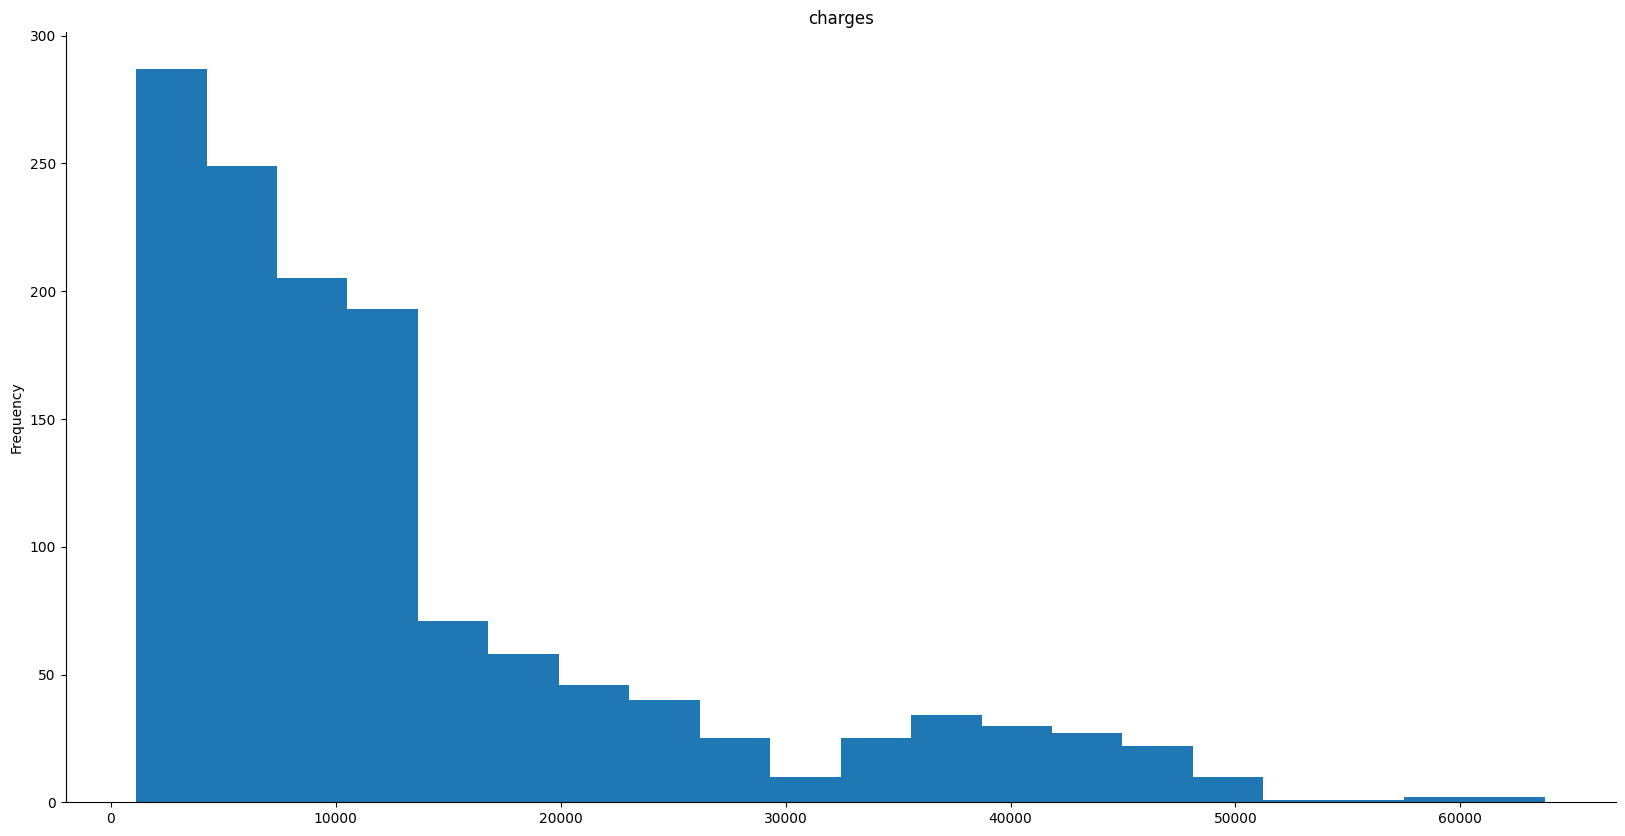

In [ ]:
# @title charges

from matplotlib import pyplot as plt
df['charges'].plot(kind='hist', bins=20, title='charges')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [1]:
## Распределение не нормальное

In [ ]:
categorical = ["sex", "smoker", "region"]
dummies = pd.get_dummies(df[categorical],drop_first=True)
dummies = dummies.astype(int)
df = pd.concat([df, dummies], axis=1)
df = df.drop(categorical, axis=1)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [ ]:
continuous_fields = ['age', 'bmi', 'children', 'charges']
# Важно сохранить мат. ожидания и дисперсии, чтобы потом мы могли обратить нормировку
scaled_features = {}

for field in continuous_fields:
    mean, std = df[field].mean(),df[field].std()
    scaled_features[field] = [mean, std]
    df.loc[:, field] = (df[field] - mean)/std

<ipython-input-242-82c34a592ce5>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.4382265  -1.50940108 -0.7976553  ... -1.50940108 -1.29587735
  1.55110577]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, field] = (df[field] - mean)/std
<ipython-input-242-82c34a592ce5>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.90827406 -0.07873775  1.58033487 ... -0.90827406 -0.90827406
 -0.90827406]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, field] = (df[field] - mean)/std


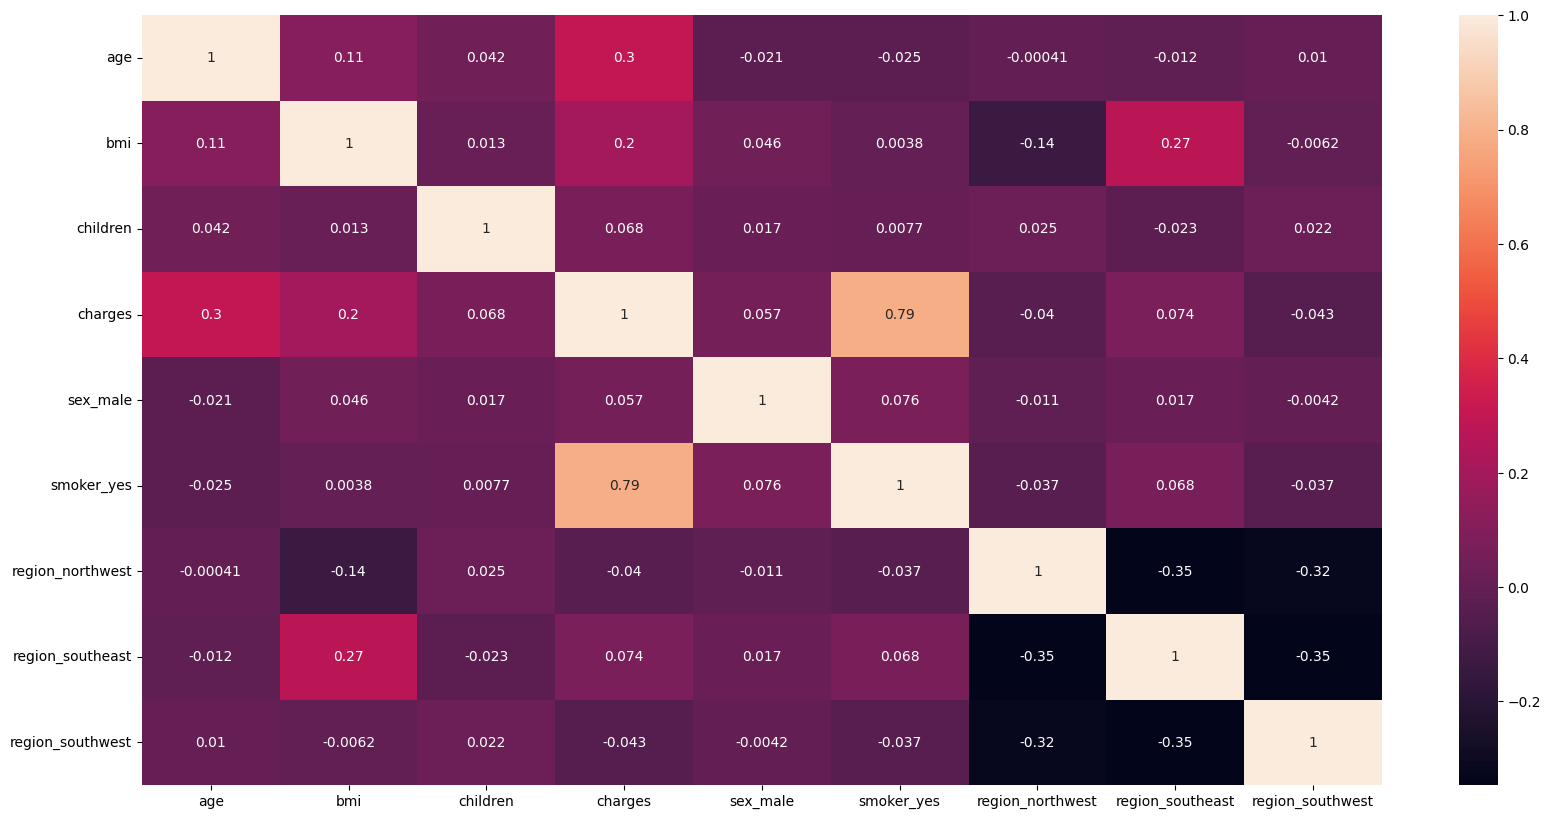

In [ ]:
import seaborn as sns
correlation = df.corr()
sns.heatmap(correlation, annot = True)
plt.show()

Исключаю наименьшую корреляцию (пол мужской)

In [ ]:
independent_variables = df[['age','bmi','children','smoker_yes','region_northwest','region_southeast','region_southwest']]
independent_variables

,age,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438227,-0.453151,-0.908274,1,0,0,1
1,-1.509401,0.509431,-0.078738,0,0,1,0
2,-0.797655,0.383164,1.580335,0,0,1,0
3,-0.441782,-1.305043,-0.908274,0,1,0,0
4,-0.512957,-0.292447,-0.908274,0,1,0,0
...,...,...,...,...,...,...,...
1333,0.768185,0.050278,1.580335,0,1,0,0
1334,-1.509401,0.206062,-0.908274,0,0,0,0
1335,-1.509401,1.014499,-0.908274,0,0,1,0
1336,-1.295877,-0.797515,-0.908274,0,0,0,1


In [ ]:
X = independent_variables
y = df.charges
y.head()

,charges
0,0.298472
1,-0.953333
2,-0.728402
3,0.719574
4,-0.776512


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torchvision.transforms as T


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
target=['charges']
train_features, train_targets = X_train, y_train
test_features, test_targets = X_test, y_test
val_features, val_targets = X_validation, y_validation
train_features

,age,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest
196,-0.014735,0.350367,-0.908274,0,0,0,1
1209,1.408757,1.055495,-0.078738,0,0,0,1
353,-0.441782,0.751306,-0.908274,0,0,0,0
461,0.198789,-0.108786,-0.908274,1,0,0,1
629,0.341138,1.358863,-0.908274,1,1,0,0
...,...,...,...,...,...,...,...
1095,-1.509401,0.112591,2.409871,0,0,0,0
1130,-0.014735,-1.114003,3.239407,0,0,1,0
1294,1.337582,-0.900005,-0.908274,0,0,0,0
860,-0.157084,2.777318,0.750799,1,0,0,1


In [ ]:
train_features, train_targets = torch.Tensor(train_features.values).float(), torch.Tensor(train_targets.values).float() # переводим данные в тензор
val_features, val_targets = torch.Tensor(val_features.values).float(), torch.Tensor(val_targets.values).float()
test_features, test_targets = torch.Tensor(test_features.values).float(), torch.Tensor(test_targets.values).float()

In [ ]:
train_dataset=TensorDataset(train_features, train_targets)
val_dataset=TensorDataset(val_features, val_targets)
test_dataset=TensorDataset(test_features, test_targets)

In [ ]:
X_train.shape

(1204, 7)

In [ ]:
train_dataset[0]

(tensor([-0.0147,  0.3504, -0.9083,  0.0000,  0.0000,  0.0000,  1.0000]),
 tensor(-0.6293))

In [ ]:
class Insurance_Reg(nn.Module):
    def __init__(self):
        super(Insurance_Reg, self).__init__()
        self.fc1 = nn.Linear(7, 3)
        self.fc2 = nn.Linear(3, 1)
        self.activation = nn.ReLU(inplace=True)

    def forward(self, x):
        # 1-й слой
        x=self.fc1(x)
        x=self.activation(x)
        # финальный слой
        x=self.fc2(x)
        return x

In [ ]:
! pip install torchinfo

In [ ]:
from torchinfo import summary
from tqdm import tqdm

In [ ]:
model = Insurance_Reg()
model.to(device)

Insurance_Reg(
  (fc1): Linear(in_features=7, out_features=3, bias=True)
  (fc2): Linear(in_features=3, out_features=1, bias=True)
  (activation): ReLU(inplace=True)
)

In [ ]:
summary(model, input_size=(1,7))

Layer (type:depth-idx)                   Output Shape              Param #
Insurance_Reg                            [1, 1]                    --
├─Linear: 1-1                            [1, 3]                    24
├─ReLU: 1-2                              [1, 3]                    --
├─Linear: 1-3                            [1, 1]                    4
Total params: 28
Trainable params: 28
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [ ]:
batch_size=32 # размер пакета
train_loader = DataLoader(train_dataset, batch_size, shuffle=False) # загрузчики данных
val_loader = DataLoader(val_dataset, batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False)

In [ ]:
criterion = nn.MSELoss(reduction='mean') # функция ошибки
optimizer=torch.optim.Adam(model.parameters()) # алгоритм оптимизации

In [ ]:
train_losses=[]
def train(model,epoch):
  print('\nEpoch : %d'%epoch)
  model.train() # веса модели можно обновлять
  running_loss=0
  for data in tqdm(train_loader):
      inputs, targets=data[0].to(device),data[1].to(device) # распаковываем пакеты
      optimizer.zero_grad() # обнуляем градиенты
      outputs=model(inputs) # считаем предсказания - прямой проход модели
      loss=criterion(outputs,targets) # ошибка пакета
      loss.backward() # обратное распространение ошибки
      optimizer.step() # итерация алгоритма оптимизации

      running_loss += loss.item()

  train_loss=running_loss/len(train_loader)
  train_losses.append(train_loss)
  print('Ошибка обучения в эпохе: %.4f'%(train_loss))

In [ ]:
val_losses=[]
def val(model,epoch):
    print('\nEpoch : %d'%epoch)
    model.eval() # веса модели заморожены
    running_loss=0
    with torch.no_grad(): # запрещаем переисывать градиенты
        for data in tqdm(val_loader):
            inputs, targets=data[0].to(device),data[1].to(device)
            outputs=model(inputs)
            loss=criterion(outputs,targets)
            running_loss += loss.item()
        val_loss=running_loss/len(val_loader)
        val_losses.append(val_loss)
        print('Ошибка валидации в эпохе: %.4f:'%(val_loss))

In [ ]:
max_epochs=512
for epoch in range(1,max_epochs+1):
    train(model,epoch)
    val(model,epoch)


Epoch : 1


  0%|          | 0/38 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([20])) that is different to the input size (torch.Size([20, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 38/38 [00:00<00:00, 558.20it/s]


Ошибка обучения в эпохе: 1.0242

Epoch : 1


  0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:610: UserWarning: Using a target size (torch.Size([6])) that is different to the input size (torch.Size([6, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 5/5 [00:00<00:00, 754.18it/s]


Ошибка валидации в эпохе: 0.8615:

Epoch : 2


100%|██████████| 38/38 [00:00<00:00, 596.82it/s]


Ошибка обучения в эпохе: 1.0153

Epoch : 2


100%|██████████| 5/5 [00:00<00:00, 935.64it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 3


100%|██████████| 38/38 [00:00<00:00, 652.63it/s]


Ошибка обучения в эпохе: 1.0116

Epoch : 3


100%|██████████| 5/5 [00:00<00:00, 911.49it/s]


Ошибка валидации в эпохе: 0.8504:

Epoch : 4


100%|██████████| 38/38 [00:00<00:00, 600.35it/s]


Ошибка обучения в эпохе: 1.0099

Epoch : 4


100%|██████████| 5/5 [00:00<00:00, 756.47it/s]


Ошибка валидации в эпохе: 0.8499:

Epoch : 5


100%|██████████| 38/38 [00:00<00:00, 607.36it/s]


Ошибка обучения в эпохе: 1.0088

Epoch : 5


100%|██████████| 5/5 [00:00<00:00, 952.73it/s]


Ошибка валидации в эпохе: 0.8501:

Epoch : 6


100%|██████████| 38/38 [00:00<00:00, 677.90it/s]


Ошибка обучения в эпохе: 1.0081

Epoch : 6


100%|██████████| 5/5 [00:00<00:00, 853.40it/s]


Ошибка валидации в эпохе: 0.8507:

Epoch : 7


100%|██████████| 38/38 [00:00<00:00, 653.88it/s]


Ошибка обучения в эпохе: 1.0076

Epoch : 7


100%|██████████| 5/5 [00:00<00:00, 670.34it/s]


Ошибка валидации в эпохе: 0.8513:

Epoch : 8


100%|██████████| 38/38 [00:00<00:00, 569.51it/s]


Ошибка обучения в эпохе: 1.0072

Epoch : 8


100%|██████████| 5/5 [00:00<00:00, 835.75it/s]


Ошибка валидации в эпохе: 0.8518:

Epoch : 9


100%|██████████| 38/38 [00:00<00:00, 655.34it/s]


Ошибка обучения в эпохе: 1.0069

Epoch : 9


100%|██████████| 5/5 [00:00<00:00, 870.30it/s]


Ошибка валидации в эпохе: 0.8523:

Epoch : 10


100%|██████████| 38/38 [00:00<00:00, 634.60it/s]


Ошибка обучения в эпохе: 1.0067

Epoch : 10


100%|██████████| 5/5 [00:00<00:00, 850.60it/s]


Ошибка валидации в эпохе: 0.8528:

Epoch : 11


100%|██████████| 38/38 [00:00<00:00, 677.39it/s]


Ошибка обучения в эпохе: 1.0066

Epoch : 11


100%|██████████| 5/5 [00:00<00:00, 541.97it/s]


Ошибка валидации в эпохе: 0.8532:

Epoch : 12


100%|██████████| 38/38 [00:00<00:00, 600.68it/s]


Ошибка обучения в эпохе: 1.0064

Epoch : 12


100%|██████████| 5/5 [00:00<00:00, 462.59it/s]


Ошибка валидации в эпохе: 0.8535:

Epoch : 13


100%|██████████| 38/38 [00:00<00:00, 403.93it/s]


Ошибка обучения в эпохе: 1.0063

Epoch : 13


100%|██████████| 5/5 [00:00<00:00, 910.58it/s]


Ошибка валидации в эпохе: 0.8538:

Epoch : 14


100%|██████████| 38/38 [00:00<00:00, 429.06it/s]


Ошибка обучения в эпохе: 1.0062

Epoch : 14


100%|██████████| 5/5 [00:00<00:00, 543.90it/s]


Ошибка валидации в эпохе: 0.8541:

Epoch : 15


100%|██████████| 38/38 [00:00<00:00, 479.13it/s]


Ошибка обучения в эпохе: 1.0062

Epoch : 15


100%|██████████| 5/5 [00:00<00:00, 655.93it/s]


Ошибка валидации в эпохе: 0.8543:

Epoch : 16


100%|██████████| 38/38 [00:00<00:00, 476.73it/s]


Ошибка обучения в эпохе: 1.0061

Epoch : 16


100%|██████████| 5/5 [00:00<00:00, 614.87it/s]


Ошибка валидации в эпохе: 0.8544:

Epoch : 17


100%|██████████| 38/38 [00:00<00:00, 321.52it/s]


Ошибка обучения в эпохе: 1.0060

Epoch : 17


100%|██████████| 5/5 [00:00<00:00, 608.38it/s]


Ошибка валидации в эпохе: 0.8546:

Epoch : 18


100%|██████████| 38/38 [00:00<00:00, 395.52it/s]


Ошибка обучения в эпохе: 1.0060

Epoch : 18


100%|██████████| 5/5 [00:00<00:00, 789.95it/s]


Ошибка валидации в эпохе: 0.8547:

Epoch : 19


100%|██████████| 38/38 [00:00<00:00, 467.41it/s]


Ошибка обучения в эпохе: 1.0059

Epoch : 19


100%|██████████| 5/5 [00:00<00:00, 1034.76it/s]


Ошибка валидации в эпохе: 0.8548:

Epoch : 20


100%|██████████| 38/38 [00:00<00:00, 428.80it/s]


Ошибка обучения в эпохе: 1.0059

Epoch : 20


100%|██████████| 5/5 [00:00<00:00, 814.87it/s]


Ошибка валидации в эпохе: 0.8549:

Epoch : 21


100%|██████████| 38/38 [00:00<00:00, 483.33it/s]


Ошибка обучения в эпохе: 1.0059

Epoch : 21


100%|██████████| 5/5 [00:00<00:00, 861.82it/s]


Ошибка валидации в эпохе: 0.8550:

Epoch : 22


100%|██████████| 38/38 [00:00<00:00, 474.69it/s]


Ошибка обучения в эпохе: 1.0058

Epoch : 22


100%|██████████| 5/5 [00:00<00:00, 737.60it/s]


Ошибка валидации в эпохе: 0.8550:

Epoch : 23


100%|██████████| 38/38 [00:00<00:00, 302.72it/s]


Ошибка обучения в эпохе: 1.0058

Epoch : 23


100%|██████████| 5/5 [00:00<00:00, 876.96it/s]


Ошибка валидации в эпохе: 0.8550:

Epoch : 24


100%|██████████| 38/38 [00:00<00:00, 457.03it/s]


Ошибка обучения в эпохе: 1.0057

Epoch : 24


100%|██████████| 5/5 [00:00<00:00, 914.03it/s]


Ошибка валидации в эпохе: 0.8551:

Epoch : 25


100%|██████████| 38/38 [00:00<00:00, 485.55it/s]


Ошибка обучения в эпохе: 1.0057

Epoch : 25


100%|██████████| 5/5 [00:00<00:00, 629.32it/s]


Ошибка валидации в эпохе: 0.8551:

Epoch : 26


100%|██████████| 38/38 [00:00<00:00, 446.34it/s]


Ошибка обучения в эпохе: 1.0057

Epoch : 26


100%|██████████| 5/5 [00:00<00:00, 930.83it/s]


Ошибка валидации в эпохе: 0.8551:

Epoch : 27


100%|██████████| 38/38 [00:00<00:00, 497.26it/s]


Ошибка обучения в эпохе: 1.0057

Epoch : 27


100%|██████████| 5/5 [00:00<00:00, 1108.90it/s]


Ошибка валидации в эпохе: 0.8551:

Epoch : 28


100%|██████████| 38/38 [00:00<00:00, 460.01it/s]


Ошибка обучения в эпохе: 1.0056

Epoch : 28


100%|██████████| 5/5 [00:00<00:00, 978.88it/s]


Ошибка валидации в эпохе: 0.8551:

Epoch : 29


100%|██████████| 38/38 [00:00<00:00, 495.88it/s]


Ошибка обучения в эпохе: 1.0056

Epoch : 29


100%|██████████| 5/5 [00:00<00:00, 1193.19it/s]


Ошибка валидации в эпохе: 0.8550:

Epoch : 30


100%|██████████| 38/38 [00:00<00:00, 528.03it/s]


Ошибка обучения в эпохе: 1.0056

Epoch : 30


100%|██████████| 5/5 [00:00<00:00, 867.34it/s]


Ошибка валидации в эпохе: 0.8550:

Epoch : 31


100%|██████████| 38/38 [00:00<00:00, 465.46it/s]


Ошибка обучения в эпохе: 1.0056

Epoch : 31


100%|██████████| 5/5 [00:00<00:00, 1084.36it/s]


Ошибка валидации в эпохе: 0.8549:

Epoch : 32


100%|██████████| 38/38 [00:00<00:00, 357.25it/s]


Ошибка обучения в эпохе: 1.0056

Epoch : 32


100%|██████████| 5/5 [00:00<00:00, 693.34it/s]


Ошибка валидации в эпохе: 0.8549:

Epoch : 33


100%|██████████| 38/38 [00:00<00:00, 383.08it/s]


Ошибка обучения в эпохе: 1.0055

Epoch : 33


100%|██████████| 5/5 [00:00<00:00, 517.93it/s]


Ошибка валидации в эпохе: 0.8548:

Epoch : 34


100%|██████████| 38/38 [00:00<00:00, 359.49it/s]


Ошибка обучения в эпохе: 1.0055

Epoch : 34


100%|██████████| 5/5 [00:00<00:00, 554.85it/s]


Ошибка валидации в эпохе: 0.8548:

Epoch : 35


100%|██████████| 38/38 [00:00<00:00, 406.72it/s]


Ошибка обучения в эпохе: 1.0055

Epoch : 35


100%|██████████| 5/5 [00:00<00:00, 651.90it/s]


Ошибка валидации в эпохе: 0.8548:

Epoch : 36


100%|██████████| 38/38 [00:00<00:00, 359.11it/s]


Ошибка обучения в эпохе: 1.0055

Epoch : 36


100%|██████████| 5/5 [00:00<00:00, 853.09it/s]


Ошибка валидации в эпохе: 0.8547:

Epoch : 37


100%|██████████| 38/38 [00:00<00:00, 408.46it/s]


Ошибка обучения в эпохе: 1.0055

Epoch : 37


100%|██████████| 5/5 [00:00<00:00, 466.79it/s]


Ошибка валидации в эпохе: 0.8547:

Epoch : 38


100%|██████████| 38/38 [00:00<00:00, 354.63it/s]


Ошибка обучения в эпохе: 1.0055

Epoch : 38


100%|██████████| 5/5 [00:00<00:00, 618.30it/s]


Ошибка валидации в эпохе: 0.8547:

Epoch : 39


100%|██████████| 38/38 [00:00<00:00, 411.09it/s]


Ошибка обучения в эпохе: 1.0054

Epoch : 39


100%|██████████| 5/5 [00:00<00:00, 679.44it/s]


Ошибка валидации в эпохе: 0.8546:

Epoch : 40


100%|██████████| 38/38 [00:00<00:00, 363.50it/s]


Ошибка обучения в эпохе: 1.0054

Epoch : 40


100%|██████████| 5/5 [00:00<00:00, 465.92it/s]


Ошибка валидации в эпохе: 0.8546:

Epoch : 41


100%|██████████| 38/38 [00:00<00:00, 514.02it/s]


Ошибка обучения в эпохе: 1.0054

Epoch : 41


100%|██████████| 5/5 [00:00<00:00, 978.51it/s]


Ошибка валидации в эпохе: 0.8545:

Epoch : 42


100%|██████████| 38/38 [00:00<00:00, 646.85it/s]


Ошибка обучения в эпохе: 1.0054

Epoch : 42


100%|██████████| 5/5 [00:00<00:00, 1006.12it/s]


Ошибка валидации в эпохе: 0.8545:

Epoch : 43


100%|██████████| 38/38 [00:00<00:00, 568.67it/s]


Ошибка обучения в эпохе: 1.0054

Epoch : 43


100%|██████████| 5/5 [00:00<00:00, 736.00it/s]


Ошибка валидации в эпохе: 0.8545:

Epoch : 44


100%|██████████| 38/38 [00:00<00:00, 449.62it/s]


Ошибка обучения в эпохе: 1.0054

Epoch : 44


100%|██████████| 5/5 [00:00<00:00, 741.04it/s]


Ошибка валидации в эпохе: 0.8544:

Epoch : 45


100%|██████████| 38/38 [00:00<00:00, 515.12it/s]


Ошибка обучения в эпохе: 1.0054

Epoch : 45


100%|██████████| 5/5 [00:00<00:00, 923.00it/s]


Ошибка валидации в эпохе: 0.8544:

Epoch : 46


100%|██████████| 38/38 [00:00<00:00, 489.03it/s]


Ошибка обучения в эпохе: 1.0053

Epoch : 46


100%|██████████| 5/5 [00:00<00:00, 845.08it/s]


Ошибка валидации в эпохе: 0.8544:

Epoch : 47


100%|██████████| 38/38 [00:00<00:00, 544.12it/s]


Ошибка обучения в эпохе: 1.0053

Epoch : 47


100%|██████████| 5/5 [00:00<00:00, 761.47it/s]


Ошибка валидации в эпохе: 0.8543:

Epoch : 48


100%|██████████| 38/38 [00:00<00:00, 498.95it/s]


Ошибка обучения в эпохе: 1.0053

Epoch : 48


100%|██████████| 5/5 [00:00<00:00, 786.10it/s]


Ошибка валидации в эпохе: 0.8543:

Epoch : 49


100%|██████████| 38/38 [00:00<00:00, 552.92it/s]


Ошибка обучения в эпохе: 1.0053

Epoch : 49


100%|██████████| 5/5 [00:00<00:00, 752.50it/s]


Ошибка валидации в эпохе: 0.8542:

Epoch : 50


100%|██████████| 38/38 [00:00<00:00, 568.27it/s]


Ошибка обучения в эпохе: 1.0053

Epoch : 50


100%|██████████| 5/5 [00:00<00:00, 713.22it/s]


Ошибка валидации в эпохе: 0.8542:

Epoch : 51


100%|██████████| 38/38 [00:00<00:00, 520.71it/s]


Ошибка обучения в эпохе: 1.0053

Epoch : 51


100%|██████████| 5/5 [00:00<00:00, 842.30it/s]


Ошибка валидации в эпохе: 0.8542:

Epoch : 52


100%|██████████| 38/38 [00:00<00:00, 578.21it/s]


Ошибка обучения в эпохе: 1.0053

Epoch : 52


100%|██████████| 5/5 [00:00<00:00, 659.81it/s]


Ошибка валидации в эпохе: 0.8542:

Epoch : 53


100%|██████████| 38/38 [00:00<00:00, 543.76it/s]


Ошибка обучения в эпохе: 1.0053

Epoch : 53


100%|██████████| 5/5 [00:00<00:00, 618.61it/s]


Ошибка валидации в эпохе: 0.8541:

Epoch : 54


100%|██████████| 38/38 [00:00<00:00, 562.36it/s]


Ошибка обучения в эпохе: 1.0053

Epoch : 54


100%|██████████| 5/5 [00:00<00:00, 582.43it/s]


Ошибка валидации в эпохе: 0.8541:

Epoch : 55


100%|██████████| 38/38 [00:00<00:00, 576.15it/s]


Ошибка обучения в эпохе: 1.0053

Epoch : 55


100%|██████████| 5/5 [00:00<00:00, 849.81it/s]


Ошибка валидации в эпохе: 0.8541:

Epoch : 56


100%|██████████| 38/38 [00:00<00:00, 432.08it/s]


Ошибка обучения в эпохе: 1.0053

Epoch : 56


100%|██████████| 5/5 [00:00<00:00, 783.25it/s]


Ошибка валидации в эпохе: 0.8541:

Epoch : 57


100%|██████████| 38/38 [00:00<00:00, 569.01it/s]


Ошибка обучения в эпохе: 1.0053

Epoch : 57


100%|██████████| 5/5 [00:00<00:00, 816.04it/s]


Ошибка валидации в эпохе: 0.8540:

Epoch : 58


100%|██████████| 38/38 [00:00<00:00, 585.61it/s]


Ошибка обучения в эпохе: 1.0052

Epoch : 58


100%|██████████| 5/5 [00:00<00:00, 739.50it/s]


Ошибка валидации в эпохе: 0.8540:

Epoch : 59


100%|██████████| 38/38 [00:00<00:00, 530.32it/s]


Ошибка обучения в эпохе: 1.0052

Epoch : 59


100%|██████████| 5/5 [00:00<00:00, 790.16it/s]


Ошибка валидации в эпохе: 0.8540:

Epoch : 60


100%|██████████| 38/38 [00:00<00:00, 600.46it/s]


Ошибка обучения в эпохе: 1.0052

Epoch : 60


100%|██████████| 5/5 [00:00<00:00, 811.78it/s]


Ошибка валидации в эпохе: 0.8539:

Epoch : 61


100%|██████████| 38/38 [00:00<00:00, 569.22it/s]


Ошибка обучения в эпохе: 1.0052

Epoch : 61


100%|██████████| 5/5 [00:00<00:00, 743.54it/s]


Ошибка валидации в эпохе: 0.8539:

Epoch : 62


100%|██████████| 38/38 [00:00<00:00, 586.17it/s]


Ошибка обучения в эпохе: 1.0052

Epoch : 62


100%|██████████| 5/5 [00:00<00:00, 820.03it/s]


Ошибка валидации в эпохе: 0.8539:

Epoch : 63


100%|██████████| 38/38 [00:00<00:00, 612.01it/s]


Ошибка обучения в эпохе: 1.0052

Epoch : 63


100%|██████████| 5/5 [00:00<00:00, 993.58it/s]


Ошибка валидации в эпохе: 0.8538:

Epoch : 64


100%|██████████| 38/38 [00:00<00:00, 593.51it/s]


Ошибка обучения в эпохе: 1.0052

Epoch : 64


100%|██████████| 5/5 [00:00<00:00, 838.46it/s]


Ошибка валидации в эпохе: 0.8538:

Epoch : 65


100%|██████████| 38/38 [00:00<00:00, 504.60it/s]


Ошибка обучения в эпохе: 1.0052

Epoch : 65


100%|██████████| 5/5 [00:00<00:00, 748.98it/s]


Ошибка валидации в эпохе: 0.8538:

Epoch : 66


100%|██████████| 38/38 [00:00<00:00, 547.96it/s]


Ошибка обучения в эпохе: 1.0052

Epoch : 66


100%|██████████| 5/5 [00:00<00:00, 895.53it/s]


Ошибка валидации в эпохе: 0.8538:

Epoch : 67


100%|██████████| 38/38 [00:00<00:00, 501.36it/s]


Ошибка обучения в эпохе: 1.0052

Epoch : 67


100%|██████████| 5/5 [00:00<00:00, 874.18it/s]


Ошибка валидации в эпохе: 0.8538:

Epoch : 68


100%|██████████| 38/38 [00:00<00:00, 427.92it/s]


Ошибка обучения в эпохе: 1.0052

Epoch : 68


100%|██████████| 5/5 [00:00<00:00, 974.74it/s]


Ошибка валидации в эпохе: 0.8537:

Epoch : 69


100%|██████████| 38/38 [00:00<00:00, 535.55it/s]


Ошибка обучения в эпохе: 1.0052

Epoch : 69


100%|██████████| 5/5 [00:00<00:00, 814.36it/s]


Ошибка валидации в эпохе: 0.8537:

Epoch : 70


100%|██████████| 38/38 [00:00<00:00, 538.52it/s]


Ошибка обучения в эпохе: 1.0052

Epoch : 70


100%|██████████| 5/5 [00:00<00:00, 450.43it/s]


Ошибка валидации в эпохе: 0.8537:

Epoch : 71


100%|██████████| 38/38 [00:00<00:00, 512.22it/s]


Ошибка обучения в эпохе: 1.0052

Epoch : 71


100%|██████████| 5/5 [00:00<00:00, 889.87it/s]


Ошибка валидации в эпохе: 0.8536:

Epoch : 72


100%|██████████| 38/38 [00:00<00:00, 553.36it/s]


Ошибка обучения в эпохе: 1.0052

Epoch : 72


100%|██████████| 5/5 [00:00<00:00, 838.49it/s]


Ошибка валидации в эпохе: 0.8536:

Epoch : 73


100%|██████████| 38/38 [00:00<00:00, 508.35it/s]


Ошибка обучения в эпохе: 1.0052

Epoch : 73


100%|██████████| 5/5 [00:00<00:00, 657.00it/s]


Ошибка валидации в эпохе: 0.8536:

Epoch : 74


100%|██████████| 38/38 [00:00<00:00, 517.24it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 74


100%|██████████| 5/5 [00:00<00:00, 807.78it/s]


Ошибка валидации в эпохе: 0.8536:

Epoch : 75


100%|██████████| 38/38 [00:00<00:00, 633.26it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 75


100%|██████████| 5/5 [00:00<00:00, 639.94it/s]


Ошибка валидации в эпохе: 0.8535:

Epoch : 76


100%|██████████| 38/38 [00:00<00:00, 572.45it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 76


100%|██████████| 5/5 [00:00<00:00, 762.30it/s]


Ошибка валидации в эпохе: 0.8535:

Epoch : 77


100%|██████████| 38/38 [00:00<00:00, 534.65it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 77


100%|██████████| 5/5 [00:00<00:00, 948.12it/s]


Ошибка валидации в эпохе: 0.8535:

Epoch : 78


100%|██████████| 38/38 [00:00<00:00, 569.44it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 78


100%|██████████| 5/5 [00:00<00:00, 765.61it/s]


Ошибка валидации в эпохе: 0.8535:

Epoch : 79


100%|██████████| 38/38 [00:00<00:00, 615.18it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 79


100%|██████████| 5/5 [00:00<00:00, 801.36it/s]


Ошибка валидации в эпохе: 0.8535:

Epoch : 80


100%|██████████| 38/38 [00:00<00:00, 465.14it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 80


100%|██████████| 5/5 [00:00<00:00, 771.83it/s]


Ошибка валидации в эпохе: 0.8535:

Epoch : 81


100%|██████████| 38/38 [00:00<00:00, 544.89it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 81


100%|██████████| 5/5 [00:00<00:00, 835.95it/s]


Ошибка валидации в эпохе: 0.8535:

Epoch : 82


100%|██████████| 38/38 [00:00<00:00, 551.94it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 82


100%|██████████| 5/5 [00:00<00:00, 478.87it/s]


Ошибка валидации в эпохе: 0.8535:

Epoch : 83


100%|██████████| 38/38 [00:00<00:00, 580.30it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 83


100%|██████████| 5/5 [00:00<00:00, 854.86it/s]


Ошибка валидации в эпохе: 0.8534:

Epoch : 84


100%|██████████| 38/38 [00:00<00:00, 588.96it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 84


100%|██████████| 5/5 [00:00<00:00, 930.87it/s]


Ошибка валидации в эпохе: 0.8534:

Epoch : 85


100%|██████████| 38/38 [00:00<00:00, 665.39it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 85


100%|██████████| 5/5 [00:00<00:00, 881.34it/s]


Ошибка валидации в эпохе: 0.8534:

Epoch : 86


100%|██████████| 38/38 [00:00<00:00, 534.87it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 86


100%|██████████| 5/5 [00:00<00:00, 754.02it/s]


Ошибка валидации в эпохе: 0.8534:

Epoch : 87


100%|██████████| 38/38 [00:00<00:00, 596.46it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 87


100%|██████████| 5/5 [00:00<00:00, 1049.94it/s]


Ошибка валидации в эпохе: 0.8534:

Epoch : 88


100%|██████████| 38/38 [00:00<00:00, 590.78it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 88


100%|██████████| 5/5 [00:00<00:00, 900.30it/s]


Ошибка валидации в эпохе: 0.8534:

Epoch : 89


100%|██████████| 38/38 [00:00<00:00, 542.67it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 89


100%|██████████| 5/5 [00:00<00:00, 915.47it/s]


Ошибка валидации в эпохе: 0.8533:

Epoch : 90


100%|██████████| 38/38 [00:00<00:00, 592.11it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 90


100%|██████████| 5/5 [00:00<00:00, 751.32it/s]


Ошибка валидации в эпохе: 0.8533:

Epoch : 91


100%|██████████| 38/38 [00:00<00:00, 567.80it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 91


100%|██████████| 5/5 [00:00<00:00, 606.74it/s]


Ошибка валидации в эпохе: 0.8533:

Epoch : 92


100%|██████████| 38/38 [00:00<00:00, 501.90it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 92


100%|██████████| 5/5 [00:00<00:00, 718.25it/s]


Ошибка валидации в эпохе: 0.8532:

Epoch : 93


100%|██████████| 38/38 [00:00<00:00, 521.70it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 93


100%|██████████| 5/5 [00:00<00:00, 796.09it/s]


Ошибка валидации в эпохе: 0.8532:

Epoch : 94


100%|██████████| 38/38 [00:00<00:00, 564.83it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 94


100%|██████████| 5/5 [00:00<00:00, 627.33it/s]


Ошибка валидации в эпохе: 0.8532:

Epoch : 95


100%|██████████| 38/38 [00:00<00:00, 551.61it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 95


100%|██████████| 5/5 [00:00<00:00, 989.04it/s]


Ошибка валидации в эпохе: 0.8532:

Epoch : 96


100%|██████████| 38/38 [00:00<00:00, 601.64it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 96


100%|██████████| 5/5 [00:00<00:00, 947.39it/s]


Ошибка валидации в эпохе: 0.8532:

Epoch : 97


100%|██████████| 38/38 [00:00<00:00, 599.30it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 97


100%|██████████| 5/5 [00:00<00:00, 716.09it/s]


Ошибка валидации в эпохе: 0.8532:

Epoch : 98


100%|██████████| 38/38 [00:00<00:00, 572.54it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 98


100%|██████████| 5/5 [00:00<00:00, 760.89it/s]


Ошибка валидации в эпохе: 0.8532:

Epoch : 99


100%|██████████| 38/38 [00:00<00:00, 526.39it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 99


100%|██████████| 5/5 [00:00<00:00, 652.63it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 100


100%|██████████| 38/38 [00:00<00:00, 603.76it/s]


Ошибка обучения в эпохе: 1.0051

Epoch : 100


100%|██████████| 5/5 [00:00<00:00, 759.07it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 101


100%|██████████| 38/38 [00:00<00:00, 575.19it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 101


100%|██████████| 5/5 [00:00<00:00, 768.47it/s]


Ошибка валидации в эпохе: 0.8532:

Epoch : 102


100%|██████████| 38/38 [00:00<00:00, 536.11it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 102


100%|██████████| 5/5 [00:00<00:00, 823.48it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 103


100%|██████████| 38/38 [00:00<00:00, 566.99it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 103


100%|██████████| 5/5 [00:00<00:00, 944.71it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 104


100%|██████████| 38/38 [00:00<00:00, 514.07it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 104


100%|██████████| 5/5 [00:00<00:00, 874.21it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 105


100%|██████████| 38/38 [00:00<00:00, 470.19it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 105


100%|██████████| 5/5 [00:00<00:00, 915.47it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 106


100%|██████████| 38/38 [00:00<00:00, 580.08it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 106


100%|██████████| 5/5 [00:00<00:00, 994.57it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 107


100%|██████████| 38/38 [00:00<00:00, 556.37it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 107


100%|██████████| 5/5 [00:00<00:00, 909.55it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 108


100%|██████████| 38/38 [00:00<00:00, 595.22it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 108


100%|██████████| 5/5 [00:00<00:00, 708.50it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 109


100%|██████████| 38/38 [00:00<00:00, 574.19it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 109


100%|██████████| 5/5 [00:00<00:00, 833.92it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 110


100%|██████████| 38/38 [00:00<00:00, 582.34it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 110


100%|██████████| 5/5 [00:00<00:00, 1146.74it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 111


100%|██████████| 38/38 [00:00<00:00, 533.62it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 111


100%|██████████| 5/5 [00:00<00:00, 654.77it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 112


100%|██████████| 38/38 [00:00<00:00, 539.91it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 112


100%|██████████| 5/5 [00:00<00:00, 964.87it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 113


100%|██████████| 38/38 [00:00<00:00, 555.59it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 113


100%|██████████| 5/5 [00:00<00:00, 1056.34it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 114


100%|██████████| 38/38 [00:00<00:00, 568.48it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 114


100%|██████████| 5/5 [00:00<00:00, 1023.40it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 115


100%|██████████| 38/38 [00:00<00:00, 565.24it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 115


100%|██████████| 5/5 [00:00<00:00, 812.79it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 116


100%|██████████| 38/38 [00:00<00:00, 557.86it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 116


100%|██████████| 5/5 [00:00<00:00, 1015.62it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 117


100%|██████████| 38/38 [00:00<00:00, 510.66it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 117


100%|██████████| 5/5 [00:00<00:00, 712.59it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 118


100%|██████████| 38/38 [00:00<00:00, 419.66it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 118


100%|██████████| 5/5 [00:00<00:00, 722.26it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 119


100%|██████████| 38/38 [00:00<00:00, 533.96it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 119


100%|██████████| 5/5 [00:00<00:00, 947.74it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 120


100%|██████████| 38/38 [00:00<00:00, 567.63it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 120


100%|██████████| 5/5 [00:00<00:00, 997.08it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 121


100%|██████████| 38/38 [00:00<00:00, 547.98it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 121


100%|██████████| 5/5 [00:00<00:00, 1017.24it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 122


100%|██████████| 38/38 [00:00<00:00, 495.52it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 122


100%|██████████| 5/5 [00:00<00:00, 812.25it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 123


100%|██████████| 38/38 [00:00<00:00, 538.57it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 123


100%|██████████| 5/5 [00:00<00:00, 905.31it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 124


100%|██████████| 38/38 [00:00<00:00, 580.27it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 124


100%|██████████| 5/5 [00:00<00:00, 999.74it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 125


100%|██████████| 38/38 [00:00<00:00, 536.93it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 125


100%|██████████| 5/5 [00:00<00:00, 933.52it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 126


100%|██████████| 38/38 [00:00<00:00, 553.22it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 126


100%|██████████| 5/5 [00:00<00:00, 862.00it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 127


100%|██████████| 38/38 [00:00<00:00, 555.38it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 127


100%|██████████| 5/5 [00:00<00:00, 887.95it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 128


100%|██████████| 38/38 [00:00<00:00, 493.17it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 128


100%|██████████| 5/5 [00:00<00:00, 824.87it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 129


100%|██████████| 38/38 [00:00<00:00, 535.97it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 129


100%|██████████| 5/5 [00:00<00:00, 773.51it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 130


100%|██████████| 38/38 [00:00<00:00, 370.46it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 130


100%|██████████| 5/5 [00:00<00:00, 875.42it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 131


100%|██████████| 38/38 [00:00<00:00, 547.03it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 131


100%|██████████| 5/5 [00:00<00:00, 878.35it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 132


100%|██████████| 38/38 [00:00<00:00, 548.00it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 132


100%|██████████| 5/5 [00:00<00:00, 971.53it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 133


100%|██████████| 38/38 [00:00<00:00, 569.10it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 133


100%|██████████| 5/5 [00:00<00:00, 634.92it/s]


Ошибка валидации в эпохе: 0.8531:

Epoch : 134


100%|██████████| 38/38 [00:00<00:00, 528.60it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 134


100%|██████████| 5/5 [00:00<00:00, 922.39it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 135


100%|██████████| 38/38 [00:00<00:00, 542.53it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 135


100%|██████████| 5/5 [00:00<00:00, 1066.98it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 136


100%|██████████| 38/38 [00:00<00:00, 538.43it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 136


100%|██████████| 5/5 [00:00<00:00, 836.49it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 137


100%|██████████| 38/38 [00:00<00:00, 557.27it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 137


100%|██████████| 5/5 [00:00<00:00, 947.82it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 138


100%|██████████| 38/38 [00:00<00:00, 510.84it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 138


100%|██████████| 5/5 [00:00<00:00, 843.25it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 139


100%|██████████| 38/38 [00:00<00:00, 490.11it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 139


100%|██████████| 5/5 [00:00<00:00, 710.42it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 140


100%|██████████| 38/38 [00:00<00:00, 553.93it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 140


100%|██████████| 5/5 [00:00<00:00, 836.29it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 141


100%|██████████| 38/38 [00:00<00:00, 499.43it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 141


100%|██████████| 5/5 [00:00<00:00, 722.93it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 142


100%|██████████| 38/38 [00:00<00:00, 408.95it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 142


100%|██████████| 5/5 [00:00<00:00, 911.88it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 143


100%|██████████| 38/38 [00:00<00:00, 514.83it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 143


100%|██████████| 5/5 [00:00<00:00, 828.52it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 144


100%|██████████| 38/38 [00:00<00:00, 571.12it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 144


100%|██████████| 5/5 [00:00<00:00, 916.55it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 145


100%|██████████| 38/38 [00:00<00:00, 496.60it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 145


100%|██████████| 5/5 [00:00<00:00, 642.14it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 146


100%|██████████| 38/38 [00:00<00:00, 528.30it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 146


100%|██████████| 5/5 [00:00<00:00, 1040.25it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 147


100%|██████████| 38/38 [00:00<00:00, 520.14it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 147


100%|██████████| 5/5 [00:00<00:00, 913.83it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 148


100%|██████████| 38/38 [00:00<00:00, 564.27it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 148


100%|██████████| 5/5 [00:00<00:00, 788.55it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 149


100%|██████████| 38/38 [00:00<00:00, 493.61it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 149


100%|██████████| 5/5 [00:00<00:00, 817.89it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 150


100%|██████████| 38/38 [00:00<00:00, 491.76it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 150


100%|██████████| 5/5 [00:00<00:00, 893.51it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 151


100%|██████████| 38/38 [00:00<00:00, 510.00it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 151


100%|██████████| 5/5 [00:00<00:00, 810.09it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 152


100%|██████████| 38/38 [00:00<00:00, 539.12it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 152


100%|██████████| 5/5 [00:00<00:00, 601.85it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 153


100%|██████████| 38/38 [00:00<00:00, 477.71it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 153


100%|██████████| 5/5 [00:00<00:00, 828.59it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 154


100%|██████████| 38/38 [00:00<00:00, 432.60it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 154


100%|██████████| 5/5 [00:00<00:00, 701.01it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 155


100%|██████████| 38/38 [00:00<00:00, 459.42it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 155


100%|██████████| 5/5 [00:00<00:00, 824.51it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 156


100%|██████████| 38/38 [00:00<00:00, 508.53it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 156


100%|██████████| 5/5 [00:00<00:00, 975.56it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 157


100%|██████████| 38/38 [00:00<00:00, 448.57it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 157


100%|██████████| 5/5 [00:00<00:00, 796.16it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 158


100%|██████████| 38/38 [00:00<00:00, 434.81it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 158


100%|██████████| 5/5 [00:00<00:00, 571.01it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 159


100%|██████████| 38/38 [00:00<00:00, 419.47it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 159


100%|██████████| 5/5 [00:00<00:00, 999.26it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 160


100%|██████████| 38/38 [00:00<00:00, 362.52it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 160


100%|██████████| 5/5 [00:00<00:00, 827.25it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 161


100%|██████████| 38/38 [00:00<00:00, 395.01it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 161


100%|██████████| 5/5 [00:00<00:00, 912.32it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 162


100%|██████████| 38/38 [00:00<00:00, 396.26it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 162


100%|██████████| 5/5 [00:00<00:00, 600.27it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 163


100%|██████████| 38/38 [00:00<00:00, 305.63it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 163


100%|██████████| 5/5 [00:00<00:00, 912.44it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 164


100%|██████████| 38/38 [00:00<00:00, 333.07it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 164


100%|██████████| 5/5 [00:00<00:00, 1010.43it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 165


100%|██████████| 38/38 [00:00<00:00, 349.98it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 165


100%|██████████| 5/5 [00:00<00:00, 924.18it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 166


100%|██████████| 38/38 [00:00<00:00, 465.56it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 166


100%|██████████| 5/5 [00:00<00:00, 1058.58it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 167


100%|██████████| 38/38 [00:00<00:00, 429.83it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 167


100%|██████████| 5/5 [00:00<00:00, 500.53it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 168


100%|██████████| 38/38 [00:00<00:00, 454.31it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 168


100%|██████████| 5/5 [00:00<00:00, 653.91it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 169


100%|██████████| 38/38 [00:00<00:00, 474.07it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 169


100%|██████████| 5/5 [00:00<00:00, 675.78it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 170


100%|██████████| 38/38 [00:00<00:00, 386.19it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 170


100%|██████████| 5/5 [00:00<00:00, 643.63it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 171


100%|██████████| 38/38 [00:00<00:00, 448.77it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 171


100%|██████████| 5/5 [00:00<00:00, 743.41it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 172


100%|██████████| 38/38 [00:00<00:00, 455.34it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 172


100%|██████████| 5/5 [00:00<00:00, 737.03it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 173


100%|██████████| 38/38 [00:00<00:00, 392.63it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 173


100%|██████████| 5/5 [00:00<00:00, 737.71it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 174


100%|██████████| 38/38 [00:00<00:00, 395.65it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 174


100%|██████████| 5/5 [00:00<00:00, 969.38it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 175


100%|██████████| 38/38 [00:00<00:00, 484.54it/s]

Ошибка обучения в эпохе: 1.0050



Epoch : 175


100%|██████████| 5/5 [00:00<00:00, 903.63it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 176


100%|██████████| 38/38 [00:00<00:00, 392.99it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 176


100%|██████████| 5/5 [00:00<00:00, 491.03it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 177


100%|██████████| 38/38 [00:00<00:00, 315.43it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 177


100%|██████████| 5/5 [00:00<00:00, 992.45it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 178


100%|██████████| 38/38 [00:00<00:00, 407.60it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 178


100%|██████████| 5/5 [00:00<00:00, 714.87it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 179


100%|██████████| 38/38 [00:00<00:00, 477.28it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 179


100%|██████████| 5/5 [00:00<00:00, 1020.02it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 180


100%|██████████| 38/38 [00:00<00:00, 459.92it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 180


100%|██████████| 5/5 [00:00<00:00, 907.15it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 181


100%|██████████| 38/38 [00:00<00:00, 395.17it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 181


100%|██████████| 5/5 [00:00<00:00, 573.35it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 182


100%|██████████| 38/38 [00:00<00:00, 509.37it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 182


100%|██████████| 5/5 [00:00<00:00, 990.25it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 183


100%|██████████| 38/38 [00:00<00:00, 408.25it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 183


100%|██████████| 5/5 [00:00<00:00, 629.98it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 184


100%|██████████| 38/38 [00:00<00:00, 326.28it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 184


100%|██████████| 5/5 [00:00<00:00, 592.57it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 185


100%|██████████| 38/38 [00:00<00:00, 297.55it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 185


100%|██████████| 5/5 [00:00<00:00, 966.43it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 186


100%|██████████| 38/38 [00:00<00:00, 365.36it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 186


100%|██████████| 5/5 [00:00<00:00, 876.22it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 187


100%|██████████| 38/38 [00:00<00:00, 338.65it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 187


100%|██████████| 5/5 [00:00<00:00, 623.06it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 188


100%|██████████| 38/38 [00:00<00:00, 288.63it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 188


100%|██████████| 5/5 [00:00<00:00, 867.78it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 189


100%|██████████| 38/38 [00:00<00:00, 317.73it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 189


100%|██████████| 5/5 [00:00<00:00, 958.08it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 190


100%|██████████| 38/38 [00:00<00:00, 274.72it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 190


100%|██████████| 5/5 [00:00<00:00, 749.97it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 191


100%|██████████| 38/38 [00:00<00:00, 305.32it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 191


100%|██████████| 5/5 [00:00<00:00, 980.99it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 192


100%|██████████| 38/38 [00:00<00:00, 361.56it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 192


100%|██████████| 5/5 [00:00<00:00, 840.44it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 193


100%|██████████| 38/38 [00:00<00:00, 338.34it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 193


100%|██████████| 5/5 [00:00<00:00, 930.95it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 194


100%|██████████| 38/38 [00:00<00:00, 363.91it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 194


100%|██████████| 5/5 [00:00<00:00, 834.95it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 195


100%|██████████| 38/38 [00:00<00:00, 286.15it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 195


100%|██████████| 5/5 [00:00<00:00, 840.91it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 196


100%|██████████| 38/38 [00:00<00:00, 410.19it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 196


100%|██████████| 5/5 [00:00<00:00, 789.00it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 197


100%|██████████| 38/38 [00:00<00:00, 422.97it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 197


100%|██████████| 5/5 [00:00<00:00, 874.00it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 198


100%|██████████| 38/38 [00:00<00:00, 448.48it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 198


100%|██████████| 5/5 [00:00<00:00, 822.28it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 199


100%|██████████| 38/38 [00:00<00:00, 394.17it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 199


100%|██████████| 5/5 [00:00<00:00, 845.35it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 200


100%|██████████| 38/38 [00:00<00:00, 436.55it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 200


100%|██████████| 5/5 [00:00<00:00, 960.72it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 201


100%|██████████| 38/38 [00:00<00:00, 384.16it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 201


100%|██████████| 5/5 [00:00<00:00, 782.72it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 202


100%|██████████| 38/38 [00:00<00:00, 283.92it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 202


100%|██████████| 5/5 [00:00<00:00, 891.27it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 203


100%|██████████| 38/38 [00:00<00:00, 416.28it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 203


100%|██████████| 5/5 [00:00<00:00, 822.54it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 204


100%|██████████| 38/38 [00:00<00:00, 500.17it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 204


100%|██████████| 5/5 [00:00<00:00, 920.93it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 205


100%|██████████| 38/38 [00:00<00:00, 487.21it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 205


100%|██████████| 5/5 [00:00<00:00, 750.99it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 206


100%|██████████| 38/38 [00:00<00:00, 479.66it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 206


100%|██████████| 5/5 [00:00<00:00, 923.53it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 207


100%|██████████| 38/38 [00:00<00:00, 499.02it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 207


100%|██████████| 5/5 [00:00<00:00, 936.52it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 208


100%|██████████| 38/38 [00:00<00:00, 422.11it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 208


100%|██████████| 5/5 [00:00<00:00, 719.39it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 209


100%|██████████| 38/38 [00:00<00:00, 401.80it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 209


100%|██████████| 5/5 [00:00<00:00, 822.03it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 210


100%|██████████| 38/38 [00:00<00:00, 458.67it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 210


100%|██████████| 5/5 [00:00<00:00, 855.18it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 211


100%|██████████| 38/38 [00:00<00:00, 484.91it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 211


100%|██████████| 5/5 [00:00<00:00, 1027.06it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 212


100%|██████████| 38/38 [00:00<00:00, 497.13it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 212


100%|██████████| 5/5 [00:00<00:00, 915.27it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 213


100%|██████████| 38/38 [00:00<00:00, 374.41it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 213


100%|██████████| 5/5 [00:00<00:00, 872.58it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 214


100%|██████████| 38/38 [00:00<00:00, 486.39it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 214


100%|██████████| 5/5 [00:00<00:00, 688.58it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 215


100%|██████████| 38/38 [00:00<00:00, 461.85it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 215


100%|██████████| 5/5 [00:00<00:00, 532.64it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 216


100%|██████████| 38/38 [00:00<00:00, 502.88it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 216


100%|██████████| 5/5 [00:00<00:00, 1021.51it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 217


100%|██████████| 38/38 [00:00<00:00, 480.62it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 217


100%|██████████| 5/5 [00:00<00:00, 780.63it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 218


100%|██████████| 38/38 [00:00<00:00, 465.78it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 218


100%|██████████| 5/5 [00:00<00:00, 842.60it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 219


100%|██████████| 38/38 [00:00<00:00, 463.05it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 219


100%|██████████| 5/5 [00:00<00:00, 830.95it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 220


100%|██████████| 38/38 [00:00<00:00, 456.93it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 220


100%|██████████| 5/5 [00:00<00:00, 635.64it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 221


100%|██████████| 38/38 [00:00<00:00, 463.04it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 221


100%|██████████| 5/5 [00:00<00:00, 839.53it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 222


100%|██████████| 38/38 [00:00<00:00, 392.77it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 222


100%|██████████| 5/5 [00:00<00:00, 896.07it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 223


100%|██████████| 38/38 [00:00<00:00, 441.18it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 223


100%|██████████| 5/5 [00:00<00:00, 856.71it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 224


100%|██████████| 38/38 [00:00<00:00, 321.21it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 224


100%|██████████| 5/5 [00:00<00:00, 869.86it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 225


100%|██████████| 38/38 [00:00<00:00, 473.89it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 225


100%|██████████| 5/5 [00:00<00:00, 1118.36it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 226


100%|██████████| 38/38 [00:00<00:00, 458.35it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 226


100%|██████████| 5/5 [00:00<00:00, 635.17it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 227


100%|██████████| 38/38 [00:00<00:00, 497.23it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 227


100%|██████████| 5/5 [00:00<00:00, 864.20it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 228


100%|██████████| 38/38 [00:00<00:00, 484.86it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 228


100%|██████████| 5/5 [00:00<00:00, 970.99it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 229


100%|██████████| 38/38 [00:00<00:00, 449.80it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 229


100%|██████████| 5/5 [00:00<00:00, 718.62it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 230


100%|██████████| 38/38 [00:00<00:00, 521.56it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 230


100%|██████████| 5/5 [00:00<00:00, 997.74it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 231


100%|██████████| 38/38 [00:00<00:00, 476.69it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 231


100%|██████████| 5/5 [00:00<00:00, 852.64it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 232


100%|██████████| 38/38 [00:00<00:00, 506.35it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 232


100%|██████████| 5/5 [00:00<00:00, 888.77it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 233


100%|██████████| 38/38 [00:00<00:00, 485.56it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 233


100%|██████████| 5/5 [00:00<00:00, 861.78it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 234


100%|██████████| 38/38 [00:00<00:00, 467.90it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 234


100%|██████████| 5/5 [00:00<00:00, 983.42it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 235


100%|██████████| 38/38 [00:00<00:00, 354.79it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 235


100%|██████████| 5/5 [00:00<00:00, 735.95it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 236


100%|██████████| 38/38 [00:00<00:00, 509.40it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 236


100%|██████████| 5/5 [00:00<00:00, 931.53it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 237


100%|██████████| 38/38 [00:00<00:00, 484.75it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 237


100%|██████████| 5/5 [00:00<00:00, 749.97it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 238


100%|██████████| 38/38 [00:00<00:00, 502.46it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 238


100%|██████████| 5/5 [00:00<00:00, 972.43it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 239


100%|██████████| 38/38 [00:00<00:00, 462.12it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 239


100%|██████████| 5/5 [00:00<00:00, 897.29it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 240


100%|██████████| 38/38 [00:00<00:00, 450.10it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 240


100%|██████████| 5/5 [00:00<00:00, 1000.41it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 241


100%|██████████| 38/38 [00:00<00:00, 461.60it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 241


100%|██████████| 5/5 [00:00<00:00, 887.12it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 242


100%|██████████| 38/38 [00:00<00:00, 490.45it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 242


100%|██████████| 5/5 [00:00<00:00, 900.07it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 243


100%|██████████| 38/38 [00:00<00:00, 485.63it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 243


100%|██████████| 5/5 [00:00<00:00, 905.62it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 244


100%|██████████| 38/38 [00:00<00:00, 502.33it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 244


100%|██████████| 5/5 [00:00<00:00, 828.95it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 245


100%|██████████| 38/38 [00:00<00:00, 452.30it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 245


100%|██████████| 5/5 [00:00<00:00, 879.42it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 246


100%|██████████| 38/38 [00:00<00:00, 384.38it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 246


100%|██████████| 5/5 [00:00<00:00, 916.99it/s]


Ошибка валидации в эпохе: 0.8528:

Epoch : 247


100%|██████████| 38/38 [00:00<00:00, 479.75it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 247


100%|██████████| 5/5 [00:00<00:00, 780.19it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 248


100%|██████████| 38/38 [00:00<00:00, 481.39it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 248


100%|██████████| 5/5 [00:00<00:00, 997.31it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 249


100%|██████████| 38/38 [00:00<00:00, 503.97it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 249


100%|██████████| 5/5 [00:00<00:00, 853.58it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 250


100%|██████████| 38/38 [00:00<00:00, 461.84it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 250


100%|██████████| 5/5 [00:00<00:00, 1068.01it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 251


100%|██████████| 38/38 [00:00<00:00, 467.43it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 251


100%|██████████| 5/5 [00:00<00:00, 862.74it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 252


100%|██████████| 38/38 [00:00<00:00, 466.56it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 252


100%|██████████| 5/5 [00:00<00:00, 843.96it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 253


100%|██████████| 38/38 [00:00<00:00, 473.12it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 253


100%|██████████| 5/5 [00:00<00:00, 824.61it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 254


100%|██████████| 38/38 [00:00<00:00, 484.06it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 254


100%|██████████| 5/5 [00:00<00:00, 879.75it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 255


100%|██████████| 38/38 [00:00<00:00, 461.20it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 255


100%|██████████| 5/5 [00:00<00:00, 741.10it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 256


100%|██████████| 38/38 [00:00<00:00, 453.82it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 256


100%|██████████| 5/5 [00:00<00:00, 978.29it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 257


100%|██████████| 38/38 [00:00<00:00, 394.42it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 257


100%|██████████| 5/5 [00:00<00:00, 662.08it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 258


100%|██████████| 38/38 [00:00<00:00, 455.92it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 258


100%|██████████| 5/5 [00:00<00:00, 1112.25it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 259


100%|██████████| 38/38 [00:00<00:00, 481.60it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 259


100%|██████████| 5/5 [00:00<00:00, 995.70it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 260


100%|██████████| 38/38 [00:00<00:00, 455.01it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 260


100%|██████████| 5/5 [00:00<00:00, 998.36it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 261


100%|██████████| 38/38 [00:00<00:00, 442.32it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 261


100%|██████████| 5/5 [00:00<00:00, 644.50it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 262


100%|██████████| 38/38 [00:00<00:00, 419.43it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 262


100%|██████████| 5/5 [00:00<00:00, 816.55it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 263


100%|██████████| 38/38 [00:00<00:00, 444.53it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 263


100%|██████████| 5/5 [00:00<00:00, 823.61it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 264


100%|██████████| 38/38 [00:00<00:00, 466.62it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 264


100%|██████████| 5/5 [00:00<00:00, 865.88it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 265


100%|██████████| 38/38 [00:00<00:00, 456.37it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 265


100%|██████████| 5/5 [00:00<00:00, 993.58it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 266


100%|██████████| 38/38 [00:00<00:00, 485.11it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 266


100%|██████████| 5/5 [00:00<00:00, 948.81it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 267


100%|██████████| 38/38 [00:00<00:00, 456.07it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 267


100%|██████████| 5/5 [00:00<00:00, 918.92it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 268


100%|██████████| 38/38 [00:00<00:00, 380.02it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 268


100%|██████████| 5/5 [00:00<00:00, 889.30it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 269


100%|██████████| 38/38 [00:00<00:00, 481.58it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 269


100%|██████████| 5/5 [00:00<00:00, 613.36it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 270


100%|██████████| 38/38 [00:00<00:00, 497.77it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 270


100%|██████████| 5/5 [00:00<00:00, 1015.03it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 271


100%|██████████| 38/38 [00:00<00:00, 448.70it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 271


100%|██████████| 5/5 [00:00<00:00, 869.93it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 272


100%|██████████| 38/38 [00:00<00:00, 465.68it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 272


100%|██████████| 5/5 [00:00<00:00, 804.86it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 273


100%|██████████| 38/38 [00:00<00:00, 426.00it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 273


100%|██████████| 5/5 [00:00<00:00, 855.21it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 274


100%|██████████| 38/38 [00:00<00:00, 434.90it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 274


100%|██████████| 5/5 [00:00<00:00, 884.95it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 275


100%|██████████| 38/38 [00:00<00:00, 465.19it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 275


100%|██████████| 5/5 [00:00<00:00, 900.34it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 276


100%|██████████| 38/38 [00:00<00:00, 465.76it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 276


100%|██████████| 5/5 [00:00<00:00, 948.72it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 277


100%|██████████| 38/38 [00:00<00:00, 447.91it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 277


100%|██████████| 5/5 [00:00<00:00, 945.39it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 278


100%|██████████| 38/38 [00:00<00:00, 496.22it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 278


100%|██████████| 5/5 [00:00<00:00, 1049.84it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 279


100%|██████████| 38/38 [00:00<00:00, 362.08it/s]


Ошибка обучения в эпохе: 1.0050

Epoch : 279


100%|██████████| 5/5 [00:00<00:00, 821.90it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 280


100%|██████████| 38/38 [00:00<00:00, 470.91it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 280


100%|██████████| 5/5 [00:00<00:00, 966.96it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 281


100%|██████████| 38/38 [00:00<00:00, 447.03it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 281


100%|██████████| 5/5 [00:00<00:00, 723.53it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 282


100%|██████████| 38/38 [00:00<00:00, 445.75it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 282


100%|██████████| 5/5 [00:00<00:00, 503.94it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 283


100%|██████████| 38/38 [00:00<00:00, 447.98it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 283


100%|██████████| 5/5 [00:00<00:00, 732.19it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 284


100%|██████████| 38/38 [00:00<00:00, 485.42it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 284


100%|██████████| 5/5 [00:00<00:00, 808.68it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 285


100%|██████████| 38/38 [00:00<00:00, 439.00it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 285


100%|██████████| 5/5 [00:00<00:00, 762.49it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 286


100%|██████████| 38/38 [00:00<00:00, 501.67it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 286


100%|██████████| 5/5 [00:00<00:00, 862.35it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 287


100%|██████████| 38/38 [00:00<00:00, 464.53it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 287


100%|██████████| 5/5 [00:00<00:00, 978.19it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 288


100%|██████████| 38/38 [00:00<00:00, 479.38it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 288


100%|██████████| 5/5 [00:00<00:00, 945.90it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 289


100%|██████████| 38/38 [00:00<00:00, 461.54it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 289


100%|██████████| 5/5 [00:00<00:00, 879.27it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 290


100%|██████████| 38/38 [00:00<00:00, 370.42it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 290


100%|██████████| 5/5 [00:00<00:00, 757.18it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 291


100%|██████████| 38/38 [00:00<00:00, 517.11it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 291


100%|██████████| 5/5 [00:00<00:00, 551.66it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 292


100%|██████████| 38/38 [00:00<00:00, 398.84it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 292


100%|██████████| 5/5 [00:00<00:00, 855.70it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 293


100%|██████████| 38/38 [00:00<00:00, 464.95it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 293


100%|██████████| 5/5 [00:00<00:00, 825.29it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 294


100%|██████████| 38/38 [00:00<00:00, 413.96it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 294


100%|██████████| 5/5 [00:00<00:00, 734.99it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 295


100%|██████████| 38/38 [00:00<00:00, 442.94it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 295


100%|██████████| 5/5 [00:00<00:00, 977.78it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 296


100%|██████████| 38/38 [00:00<00:00, 403.07it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 296


100%|██████████| 5/5 [00:00<00:00, 797.18it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 297


100%|██████████| 38/38 [00:00<00:00, 362.92it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 297


100%|██████████| 5/5 [00:00<00:00, 500.18it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 298


100%|██████████| 38/38 [00:00<00:00, 408.70it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 298


100%|██████████| 5/5 [00:00<00:00, 481.22it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 299


100%|██████████| 38/38 [00:00<00:00, 396.42it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 299


100%|██████████| 5/5 [00:00<00:00, 539.46it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 300


100%|██████████| 38/38 [00:00<00:00, 298.17it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 300


100%|██████████| 5/5 [00:00<00:00, 913.04it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 301


100%|██████████| 38/38 [00:00<00:00, 381.66it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 301


100%|██████████| 5/5 [00:00<00:00, 1119.38it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 302


100%|██████████| 38/38 [00:00<00:00, 350.69it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 302


100%|██████████| 5/5 [00:00<00:00, 785.98it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 303


100%|██████████| 38/38 [00:00<00:00, 317.38it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 303


100%|██████████| 5/5 [00:00<00:00, 964.47it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 304


100%|██████████| 38/38 [00:00<00:00, 315.41it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 304


100%|██████████| 5/5 [00:00<00:00, 1108.96it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 305


100%|██████████| 38/38 [00:00<00:00, 484.68it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 305


100%|██████████| 5/5 [00:00<00:00, 1070.30it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 306


100%|██████████| 38/38 [00:00<00:00, 448.87it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 306


100%|██████████| 5/5 [00:00<00:00, 1015.72it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 307


100%|██████████| 38/38 [00:00<00:00, 454.76it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 307


100%|██████████| 5/5 [00:00<00:00, 1051.84it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 308


100%|██████████| 38/38 [00:00<00:00, 449.01it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 308


100%|██████████| 5/5 [00:00<00:00, 839.94it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 309


100%|██████████| 38/38 [00:00<00:00, 355.43it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 309


100%|██████████| 5/5 [00:00<00:00, 936.44it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 310


100%|██████████| 38/38 [00:00<00:00, 389.25it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 310


100%|██████████| 5/5 [00:00<00:00, 1069.16it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 311


100%|██████████| 38/38 [00:00<00:00, 472.86it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 311


100%|██████████| 5/5 [00:00<00:00, 995.33it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 312


100%|██████████| 38/38 [00:00<00:00, 461.66it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 312


100%|██████████| 5/5 [00:00<00:00, 1026.00it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 313


100%|██████████| 38/38 [00:00<00:00, 444.78it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 313


100%|██████████| 5/5 [00:00<00:00, 717.51it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 314


100%|██████████| 38/38 [00:00<00:00, 458.55it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 314


100%|██████████| 5/5 [00:00<00:00, 725.13it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 315


100%|██████████| 38/38 [00:00<00:00, 455.10it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 315


100%|██████████| 5/5 [00:00<00:00, 1025.05it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 316


100%|██████████| 38/38 [00:00<00:00, 493.38it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 316


100%|██████████| 5/5 [00:00<00:00, 1135.07it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 317


100%|██████████| 38/38 [00:00<00:00, 456.69it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 317


100%|██████████| 5/5 [00:00<00:00, 1084.92it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 318


100%|██████████| 38/38 [00:00<00:00, 361.73it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 318


100%|██████████| 5/5 [00:00<00:00, 910.74it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 319


100%|██████████| 38/38 [00:00<00:00, 447.63it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 319


100%|██████████| 5/5 [00:00<00:00, 1039.17it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 320


100%|██████████| 38/38 [00:00<00:00, 411.01it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 320


100%|██████████| 5/5 [00:00<00:00, 614.24it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 321


100%|██████████| 38/38 [00:00<00:00, 339.46it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 321


100%|██████████| 5/5 [00:00<00:00, 903.48it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 322


100%|██████████| 38/38 [00:00<00:00, 430.03it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 322


100%|██████████| 5/5 [00:00<00:00, 919.60it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 323


100%|██████████| 38/38 [00:00<00:00, 454.40it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 323


100%|██████████| 5/5 [00:00<00:00, 1021.26it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 324


100%|██████████| 38/38 [00:00<00:00, 427.35it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 324


100%|██████████| 5/5 [00:00<00:00, 629.66it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 325


100%|██████████| 38/38 [00:00<00:00, 363.17it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 325


100%|██████████| 5/5 [00:00<00:00, 980.99it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 326


100%|██████████| 38/38 [00:00<00:00, 345.00it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 326


100%|██████████| 5/5 [00:00<00:00, 930.87it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 327


100%|██████████| 38/38 [00:00<00:00, 425.36it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 327


100%|██████████| 5/5 [00:00<00:00, 934.14it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 328


100%|██████████| 38/38 [00:00<00:00, 487.58it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 328


100%|██████████| 5/5 [00:00<00:00, 1080.34it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 329


100%|██████████| 38/38 [00:00<00:00, 402.37it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 329


100%|██████████| 5/5 [00:00<00:00, 538.32it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 330


100%|██████████| 38/38 [00:00<00:00, 380.99it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 330


100%|██████████| 5/5 [00:00<00:00, 501.23it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 331


100%|██████████| 38/38 [00:00<00:00, 304.78it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 331


100%|██████████| 5/5 [00:00<00:00, 685.50it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 332


100%|██████████| 38/38 [00:00<00:00, 323.67it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 332


100%|██████████| 5/5 [00:00<00:00, 728.79it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 333


100%|██████████| 38/38 [00:00<00:00, 422.28it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 333


100%|██████████| 5/5 [00:00<00:00, 845.25it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 334


100%|██████████| 38/38 [00:00<00:00, 396.75it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 334


100%|██████████| 5/5 [00:00<00:00, 592.18it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 335


100%|██████████| 38/38 [00:00<00:00, 350.80it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 335


100%|██████████| 5/5 [00:00<00:00, 793.59it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 336


100%|██████████| 38/38 [00:00<00:00, 332.86it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 336


100%|██████████| 5/5 [00:00<00:00, 909.59it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 337


100%|██████████| 38/38 [00:00<00:00, 274.90it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 337


100%|██████████| 5/5 [00:00<00:00, 694.28it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 338


100%|██████████| 38/38 [00:00<00:00, 337.60it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 338


100%|██████████| 5/5 [00:00<00:00, 546.99it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 339


100%|██████████| 38/38 [00:00<00:00, 332.72it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 339


100%|██████████| 5/5 [00:00<00:00, 817.60it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 340


100%|██████████| 38/38 [00:00<00:00, 433.71it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 340


100%|██████████| 5/5 [00:00<00:00, 949.80it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 341


100%|██████████| 38/38 [00:00<00:00, 497.13it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 341


100%|██████████| 5/5 [00:00<00:00, 935.48it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 342


100%|██████████| 38/38 [00:00<00:00, 471.23it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 342


100%|██████████| 5/5 [00:00<00:00, 1085.03it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 343


100%|██████████| 38/38 [00:00<00:00, 459.59it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 343


100%|██████████| 5/5 [00:00<00:00, 967.68it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 344


100%|██████████| 38/38 [00:00<00:00, 454.45it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 344


100%|██████████| 5/5 [00:00<00:00, 745.36it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 345


100%|██████████| 38/38 [00:00<00:00, 460.96it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 345


100%|██████████| 5/5 [00:00<00:00, 725.53it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 346


100%|██████████| 38/38 [00:00<00:00, 491.68it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 346


100%|██████████| 5/5 [00:00<00:00, 736.02it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 347


100%|██████████| 38/38 [00:00<00:00, 464.50it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 347


100%|██████████| 5/5 [00:00<00:00, 993.20it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 348


100%|██████████| 38/38 [00:00<00:00, 403.96it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 348


100%|██████████| 5/5 [00:00<00:00, 772.32it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 349


100%|██████████| 38/38 [00:00<00:00, 405.55it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 349


100%|██████████| 5/5 [00:00<00:00, 873.34it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 350


100%|██████████| 38/38 [00:00<00:00, 336.89it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 350


100%|██████████| 5/5 [00:00<00:00, 914.03it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 351


100%|██████████| 38/38 [00:00<00:00, 475.90it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 351


100%|██████████| 5/5 [00:00<00:00, 966.47it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 352


100%|██████████| 38/38 [00:00<00:00, 473.97it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 352


100%|██████████| 5/5 [00:00<00:00, 950.79it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 353


100%|██████████| 38/38 [00:00<00:00, 460.83it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 353


100%|██████████| 5/5 [00:00<00:00, 980.07it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 354


100%|██████████| 38/38 [00:00<00:00, 493.45it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 354


100%|██████████| 5/5 [00:00<00:00, 1031.56it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 355


100%|██████████| 38/38 [00:00<00:00, 425.56it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 355


100%|██████████| 5/5 [00:00<00:00, 579.39it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 356


100%|██████████| 38/38 [00:00<00:00, 377.01it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 356


100%|██████████| 5/5 [00:00<00:00, 911.69it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 357


100%|██████████| 38/38 [00:00<00:00, 443.63it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 357


100%|██████████| 5/5 [00:00<00:00, 932.23it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 358


100%|██████████| 38/38 [00:00<00:00, 387.93it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 358


100%|██████████| 5/5 [00:00<00:00, 769.43it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 359


100%|██████████| 38/38 [00:00<00:00, 382.71it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 359


100%|██████████| 5/5 [00:00<00:00, 834.72it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 360


100%|██████████| 38/38 [00:00<00:00, 347.43it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 360


100%|██████████| 5/5 [00:00<00:00, 831.64it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 361


100%|██████████| 38/38 [00:00<00:00, 437.66it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 361


100%|██████████| 5/5 [00:00<00:00, 811.18it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 362


100%|██████████| 38/38 [00:00<00:00, 420.33it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 362


100%|██████████| 5/5 [00:00<00:00, 845.93it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 363


100%|██████████| 38/38 [00:00<00:00, 463.69it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 363


100%|██████████| 5/5 [00:00<00:00, 801.88it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 364


100%|██████████| 38/38 [00:00<00:00, 425.48it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 364


100%|██████████| 5/5 [00:00<00:00, 925.36it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 365


100%|██████████| 38/38 [00:00<00:00, 461.41it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 365


100%|██████████| 5/5 [00:00<00:00, 938.91it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 366


100%|██████████| 38/38 [00:00<00:00, 497.52it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 366


100%|██████████| 5/5 [00:00<00:00, 812.60it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 367


100%|██████████| 38/38 [00:00<00:00, 441.28it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 367


100%|██████████| 5/5 [00:00<00:00, 799.25it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 368


100%|██████████| 38/38 [00:00<00:00, 465.61it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 368


100%|██████████| 5/5 [00:00<00:00, 873.45it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 369


100%|██████████| 38/38 [00:00<00:00, 448.86it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 369


100%|██████████| 5/5 [00:00<00:00, 468.31it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 370


100%|██████████| 38/38 [00:00<00:00, 451.38it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 370


100%|██████████| 5/5 [00:00<00:00, 818.46it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 371


100%|██████████| 38/38 [00:00<00:00, 354.81it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 371


100%|██████████| 5/5 [00:00<00:00, 806.44it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 372


100%|██████████| 38/38 [00:00<00:00, 422.46it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 372


100%|██████████| 5/5 [00:00<00:00, 852.85it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 373


100%|██████████| 38/38 [00:00<00:00, 448.72it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 373


100%|██████████| 5/5 [00:00<00:00, 829.70it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 374


100%|██████████| 38/38 [00:00<00:00, 394.63it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 374


100%|██████████| 5/5 [00:00<00:00, 781.06it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 375


100%|██████████| 38/38 [00:00<00:00, 446.33it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 375


100%|██████████| 5/5 [00:00<00:00, 882.31it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 376


100%|██████████| 38/38 [00:00<00:00, 459.59it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 376


100%|██████████| 5/5 [00:00<00:00, 927.12it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 377


100%|██████████| 38/38 [00:00<00:00, 478.53it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 377


100%|██████████| 5/5 [00:00<00:00, 777.76it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 378


100%|██████████| 38/38 [00:00<00:00, 467.04it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 378


100%|██████████| 5/5 [00:00<00:00, 860.37it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 379


100%|██████████| 38/38 [00:00<00:00, 429.18it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 379


100%|██████████| 5/5 [00:00<00:00, 764.07it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 380


100%|██████████| 38/38 [00:00<00:00, 462.36it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 380


100%|██████████| 5/5 [00:00<00:00, 793.14it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 381


100%|██████████| 38/38 [00:00<00:00, 501.61it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 381


100%|██████████| 5/5 [00:00<00:00, 946.84it/s]


Ошибка валидации в эпохе: 0.8529:

Epoch : 382


100%|██████████| 38/38 [00:00<00:00, 363.58it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 382


100%|██████████| 5/5 [00:00<00:00, 461.98it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 383


100%|██████████| 38/38 [00:00<00:00, 408.03it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 383


100%|██████████| 5/5 [00:00<00:00, 988.20it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 384


100%|██████████| 38/38 [00:00<00:00, 394.78it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 384


100%|██████████| 5/5 [00:00<00:00, 844.94it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 385


100%|██████████| 38/38 [00:00<00:00, 462.97it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 385


100%|██████████| 5/5 [00:00<00:00, 641.06it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 386


100%|██████████| 38/38 [00:00<00:00, 447.42it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 386


100%|██████████| 5/5 [00:00<00:00, 655.61it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 387


100%|██████████| 38/38 [00:00<00:00, 425.75it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 387


100%|██████████| 5/5 [00:00<00:00, 897.33it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 388


100%|██████████| 38/38 [00:00<00:00, 492.18it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 388


100%|██████████| 5/5 [00:00<00:00, 929.79it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 389


100%|██████████| 38/38 [00:00<00:00, 438.75it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 389


100%|██████████| 5/5 [00:00<00:00, 761.94it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 390


100%|██████████| 38/38 [00:00<00:00, 490.52it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 390


100%|██████████| 5/5 [00:00<00:00, 1005.92it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 391


100%|██████████| 38/38 [00:00<00:00, 474.63it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 391


100%|██████████| 5/5 [00:00<00:00, 984.90it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 392


100%|██████████| 38/38 [00:00<00:00, 477.31it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 392


100%|██████████| 5/5 [00:00<00:00, 853.09it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 393


100%|██████████| 38/38 [00:00<00:00, 331.76it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 393


100%|██████████| 5/5 [00:00<00:00, 832.60it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 394


100%|██████████| 38/38 [00:00<00:00, 392.77it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 394


100%|██████████| 5/5 [00:00<00:00, 834.69it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 395


100%|██████████| 38/38 [00:00<00:00, 480.79it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 395


100%|██████████| 5/5 [00:00<00:00, 886.78it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 396


100%|██████████| 38/38 [00:00<00:00, 464.74it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 396


100%|██████████| 5/5 [00:00<00:00, 948.51it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 397


100%|██████████| 38/38 [00:00<00:00, 479.78it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 397


100%|██████████| 5/5 [00:00<00:00, 853.78it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 398


100%|██████████| 38/38 [00:00<00:00, 478.24it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 398


100%|██████████| 5/5 [00:00<00:00, 991.19it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 399


100%|██████████| 38/38 [00:00<00:00, 462.33it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 399


100%|██████████| 5/5 [00:00<00:00, 854.34it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 400


100%|██████████| 38/38 [00:00<00:00, 476.52it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 400


100%|██████████| 5/5 [00:00<00:00, 924.51it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 401


100%|██████████| 38/38 [00:00<00:00, 504.84it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 401


100%|██████████| 5/5 [00:00<00:00, 986.94it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 402


100%|██████████| 38/38 [00:00<00:00, 506.95it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 402


100%|██████████| 5/5 [00:00<00:00, 983.24it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 403


100%|██████████| 38/38 [00:00<00:00, 489.64it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 403


100%|██████████| 5/5 [00:00<00:00, 883.98it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 404


100%|██████████| 38/38 [00:00<00:00, 459.31it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 404


100%|██████████| 5/5 [00:00<00:00, 980.34it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 405


100%|██████████| 38/38 [00:00<00:00, 381.81it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 405


100%|██████████| 5/5 [00:00<00:00, 974.24it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 406


100%|██████████| 38/38 [00:00<00:00, 513.32it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 406


100%|██████████| 5/5 [00:00<00:00, 909.47it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 407


100%|██████████| 38/38 [00:00<00:00, 499.09it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 407


100%|██████████| 5/5 [00:00<00:00, 965.50it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 408


100%|██████████| 38/38 [00:00<00:00, 474.17it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 408


100%|██████████| 5/5 [00:00<00:00, 806.94it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 409


100%|██████████| 38/38 [00:00<00:00, 449.96it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 409


100%|██████████| 5/5 [00:00<00:00, 783.34it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 410


100%|██████████| 38/38 [00:00<00:00, 429.51it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 410


100%|██████████| 5/5 [00:00<00:00, 613.96it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 411


100%|██████████| 38/38 [00:00<00:00, 433.98it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 411


100%|██████████| 5/5 [00:00<00:00, 686.92it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 412


100%|██████████| 38/38 [00:00<00:00, 473.14it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 412


100%|██████████| 5/5 [00:00<00:00, 558.06it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 413


100%|██████████| 38/38 [00:00<00:00, 463.98it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 413


100%|██████████| 5/5 [00:00<00:00, 592.01it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 414


100%|██████████| 38/38 [00:00<00:00, 478.21it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 414


100%|██████████| 5/5 [00:00<00:00, 468.20it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 415


100%|██████████| 38/38 [00:00<00:00, 471.81it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 415


100%|██████████| 5/5 [00:00<00:00, 566.84it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 416


100%|██████████| 38/38 [00:00<00:00, 380.26it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 416


100%|██████████| 5/5 [00:00<00:00, 927.16it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 417


100%|██████████| 38/38 [00:00<00:00, 450.28it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 417


100%|██████████| 5/5 [00:00<00:00, 831.35it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 418


100%|██████████| 38/38 [00:00<00:00, 396.35it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 418


100%|██████████| 5/5 [00:00<00:00, 772.97it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 419


100%|██████████| 38/38 [00:00<00:00, 452.51it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 419


100%|██████████| 5/5 [00:00<00:00, 935.02it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 420


100%|██████████| 38/38 [00:00<00:00, 411.75it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 420


100%|██████████| 5/5 [00:00<00:00, 877.69it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 421


100%|██████████| 38/38 [00:00<00:00, 454.89it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 421


100%|██████████| 5/5 [00:00<00:00, 931.20it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 422


100%|██████████| 38/38 [00:00<00:00, 505.19it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 422


100%|██████████| 5/5 [00:00<00:00, 945.77it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 423


100%|██████████| 38/38 [00:00<00:00, 451.69it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 423


100%|██████████| 5/5 [00:00<00:00, 906.33it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 424


100%|██████████| 38/38 [00:00<00:00, 445.65it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 424


100%|██████████| 5/5 [00:00<00:00, 906.80it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 425


100%|██████████| 38/38 [00:00<00:00, 487.11it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 425


100%|██████████| 5/5 [00:00<00:00, 980.99it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 426


100%|██████████| 38/38 [00:00<00:00, 454.82it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 426


100%|██████████| 5/5 [00:00<00:00, 791.50it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 427


100%|██████████| 38/38 [00:00<00:00, 333.34it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 427


100%|██████████| 5/5 [00:00<00:00, 665.19it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 428


100%|██████████| 38/38 [00:00<00:00, 393.01it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 428


100%|██████████| 5/5 [00:00<00:00, 833.13it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 429


100%|██████████| 38/38 [00:00<00:00, 461.21it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 429


100%|██████████| 5/5 [00:00<00:00, 878.09it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 430


100%|██████████| 38/38 [00:00<00:00, 467.00it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 430


100%|██████████| 5/5 [00:00<00:00, 1002.32it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 431


100%|██████████| 38/38 [00:00<00:00, 444.30it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 431


100%|██████████| 5/5 [00:00<00:00, 996.75it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 432


100%|██████████| 38/38 [00:00<00:00, 474.04it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 432


100%|██████████| 5/5 [00:00<00:00, 617.65it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 433


100%|██████████| 38/38 [00:00<00:00, 475.94it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 433


100%|██████████| 5/5 [00:00<00:00, 907.54it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 434


100%|██████████| 38/38 [00:00<00:00, 416.01it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 434


100%|██████████| 5/5 [00:00<00:00, 705.16it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 435


100%|██████████| 38/38 [00:00<00:00, 424.37it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 435


100%|██████████| 5/5 [00:00<00:00, 828.00it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 436


100%|██████████| 38/38 [00:00<00:00, 451.12it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 436


100%|██████████| 5/5 [00:00<00:00, 882.05it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 437


100%|██████████| 38/38 [00:00<00:00, 417.65it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 437


100%|██████████| 5/5 [00:00<00:00, 661.58it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 438


100%|██████████| 38/38 [00:00<00:00, 307.17it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 438


100%|██████████| 5/5 [00:00<00:00, 916.51it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 439


100%|██████████| 38/38 [00:00<00:00, 385.54it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 439


100%|██████████| 5/5 [00:00<00:00, 913.71it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 440


100%|██████████| 38/38 [00:00<00:00, 340.78it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 440


100%|██████████| 5/5 [00:00<00:00, 1029.53it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 441


100%|██████████| 38/38 [00:00<00:00, 361.36it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 441


100%|██████████| 5/5 [00:00<00:00, 550.51it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 442


100%|██████████| 38/38 [00:00<00:00, 310.32it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 442


100%|██████████| 5/5 [00:00<00:00, 829.67it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 443


100%|██████████| 38/38 [00:00<00:00, 337.57it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 443


100%|██████████| 5/5 [00:00<00:00, 898.48it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 444


100%|██████████| 38/38 [00:00<00:00, 278.52it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 444


100%|██████████| 5/5 [00:00<00:00, 906.09it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 445


100%|██████████| 38/38 [00:00<00:00, 350.10it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 445


100%|██████████| 5/5 [00:00<00:00, 859.63it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 446


100%|██████████| 38/38 [00:00<00:00, 342.36it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 446


100%|██████████| 5/5 [00:00<00:00, 891.65it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 447


100%|██████████| 38/38 [00:00<00:00, 342.06it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 447


100%|██████████| 5/5 [00:00<00:00, 933.48it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 448


100%|██████████| 38/38 [00:00<00:00, 484.73it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 448


100%|██████████| 5/5 [00:00<00:00, 910.62it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 449


100%|██████████| 38/38 [00:00<00:00, 456.58it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 449


100%|██████████| 5/5 [00:00<00:00, 804.18it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 450


100%|██████████| 38/38 [00:00<00:00, 358.91it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 450


100%|██████████| 5/5 [00:00<00:00, 806.13it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 451


100%|██████████| 38/38 [00:00<00:00, 365.91it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 451


100%|██████████| 5/5 [00:00<00:00, 630.99it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 452


100%|██████████| 38/38 [00:00<00:00, 334.04it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 452


100%|██████████| 5/5 [00:00<00:00, 836.22it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 453


100%|██████████| 38/38 [00:00<00:00, 458.75it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 453


100%|██████████| 5/5 [00:00<00:00, 1124.78it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 454


100%|██████████| 38/38 [00:00<00:00, 435.79it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 454


100%|██████████| 5/5 [00:00<00:00, 467.83it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 455


100%|██████████| 38/38 [00:00<00:00, 371.10it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 455


100%|██████████| 5/5 [00:00<00:00, 518.38it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 456


100%|██████████| 38/38 [00:00<00:00, 348.64it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 456


100%|██████████| 5/5 [00:00<00:00, 1011.46it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 457


100%|██████████| 38/38 [00:00<00:00, 526.70it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 457


100%|██████████| 5/5 [00:00<00:00, 961.42it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 458


100%|██████████| 38/38 [00:00<00:00, 452.23it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 458


100%|██████████| 5/5 [00:00<00:00, 789.29it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 459


100%|██████████| 38/38 [00:00<00:00, 383.02it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 459


100%|██████████| 5/5 [00:00<00:00, 595.49it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 460


100%|██████████| 38/38 [00:00<00:00, 443.07it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 460


100%|██████████| 5/5 [00:00<00:00, 731.81it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 461


100%|██████████| 38/38 [00:00<00:00, 427.81it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 461


100%|██████████| 5/5 [00:00<00:00, 1030.09it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 462


100%|██████████| 38/38 [00:00<00:00, 428.54it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 462


100%|██████████| 5/5 [00:00<00:00, 688.86it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 463


100%|██████████| 38/38 [00:00<00:00, 306.34it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 463


100%|██████████| 5/5 [00:00<00:00, 667.29it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 464


100%|██████████| 38/38 [00:00<00:00, 353.85it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 464


100%|██████████| 5/5 [00:00<00:00, 633.08it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 465


100%|██████████| 38/38 [00:00<00:00, 300.77it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 465


100%|██████████| 5/5 [00:00<00:00, 870.95it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 466


100%|██████████| 38/38 [00:00<00:00, 303.97it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 466


100%|██████████| 5/5 [00:00<00:00, 567.35it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 467


100%|██████████| 38/38 [00:00<00:00, 337.12it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 467


100%|██████████| 5/5 [00:00<00:00, 1015.37it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 468


100%|██████████| 38/38 [00:00<00:00, 318.27it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 468


100%|██████████| 5/5 [00:00<00:00, 1050.15it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 469


100%|██████████| 38/38 [00:00<00:00, 316.63it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 469


100%|██████████| 5/5 [00:00<00:00, 596.00it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 470


100%|██████████| 38/38 [00:00<00:00, 327.07it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 470


100%|██████████| 5/5 [00:00<00:00, 704.76it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 471


100%|██████████| 38/38 [00:00<00:00, 360.00it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 471


100%|██████████| 5/5 [00:00<00:00, 710.61it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 472


100%|██████████| 38/38 [00:00<00:00, 340.86it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 472


100%|██████████| 5/5 [00:00<00:00, 886.15it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 473


100%|██████████| 38/38 [00:00<00:00, 433.02it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 473


100%|██████████| 5/5 [00:00<00:00, 941.74it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 474


100%|██████████| 38/38 [00:00<00:00, 300.68it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 474


100%|██████████| 5/5 [00:00<00:00, 773.31it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 475


100%|██████████| 38/38 [00:00<00:00, 320.59it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 475


100%|██████████| 5/5 [00:00<00:00, 769.29it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 476


100%|██████████| 38/38 [00:00<00:00, 269.12it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 476


100%|██████████| 5/5 [00:00<00:00, 587.60it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 477


100%|██████████| 38/38 [00:00<00:00, 341.50it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 477


100%|██████████| 5/5 [00:00<00:00, 724.68it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 478


100%|██████████| 38/38 [00:00<00:00, 383.24it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 478


100%|██████████| 5/5 [00:00<00:00, 866.16it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 479


100%|██████████| 38/38 [00:00<00:00, 433.63it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 479


100%|██████████| 5/5 [00:00<00:00, 997.12it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 480


100%|██████████| 38/38 [00:00<00:00, 486.33it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 480


100%|██████████| 5/5 [00:00<00:00, 893.62it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 481


100%|██████████| 38/38 [00:00<00:00, 454.15it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 481


100%|██████████| 5/5 [00:00<00:00, 1047.06it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 482


100%|██████████| 38/38 [00:00<00:00, 509.96it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 482


100%|██████████| 5/5 [00:00<00:00, 898.83it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 483


100%|██████████| 38/38 [00:00<00:00, 395.44it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 483


100%|██████████| 5/5 [00:00<00:00, 793.80it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 484


100%|██████████| 38/38 [00:00<00:00, 346.52it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 484


100%|██████████| 5/5 [00:00<00:00, 831.11it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 485


100%|██████████| 38/38 [00:00<00:00, 420.41it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 485


100%|██████████| 5/5 [00:00<00:00, 876.66it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 486


100%|██████████| 38/38 [00:00<00:00, 441.33it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 486


100%|██████████| 5/5 [00:00<00:00, 760.94it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 487


100%|██████████| 38/38 [00:00<00:00, 444.59it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 487


100%|██████████| 5/5 [00:00<00:00, 825.91it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 488


100%|██████████| 38/38 [00:00<00:00, 414.55it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 488


100%|██████████| 5/5 [00:00<00:00, 828.36it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 489


100%|██████████| 38/38 [00:00<00:00, 440.32it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 489


100%|██████████| 5/5 [00:00<00:00, 924.10it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 490


100%|██████████| 38/38 [00:00<00:00, 496.85it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 490


100%|██████████| 5/5 [00:00<00:00, 811.43it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 491


100%|██████████| 38/38 [00:00<00:00, 454.60it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 491


100%|██████████| 5/5 [00:00<00:00, 887.91it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 492


100%|██████████| 38/38 [00:00<00:00, 478.04it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 492


100%|██████████| 5/5 [00:00<00:00, 659.34it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 493


100%|██████████| 38/38 [00:00<00:00, 456.94it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 493


100%|██████████| 5/5 [00:00<00:00, 952.47it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 494


100%|██████████| 38/38 [00:00<00:00, 357.72it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 494


100%|██████████| 5/5 [00:00<00:00, 949.07it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 495


100%|██████████| 38/38 [00:00<00:00, 420.33it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 495


100%|██████████| 5/5 [00:00<00:00, 826.46it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 496


100%|██████████| 38/38 [00:00<00:00, 464.36it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 496


100%|██████████| 5/5 [00:00<00:00, 620.28it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 497


100%|██████████| 38/38 [00:00<00:00, 476.92it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 497


100%|██████████| 5/5 [00:00<00:00, 743.91it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 498


100%|██████████| 38/38 [00:00<00:00, 465.14it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 498


100%|██████████| 5/5 [00:00<00:00, 902.08it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 499


100%|██████████| 38/38 [00:00<00:00, 456.41it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 499


100%|██████████| 5/5 [00:00<00:00, 812.91it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 500


100%|██████████| 38/38 [00:00<00:00, 354.67it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 500


100%|██████████| 5/5 [00:00<00:00, 708.23it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 501


100%|██████████| 38/38 [00:00<00:00, 428.61it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 501


100%|██████████| 5/5 [00:00<00:00, 814.27it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 502


100%|██████████| 38/38 [00:00<00:00, 464.42it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 502


100%|██████████| 5/5 [00:00<00:00, 835.12it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 503


100%|██████████| 38/38 [00:00<00:00, 446.76it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 503


100%|██████████| 5/5 [00:00<00:00, 736.62it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 504


100%|██████████| 38/38 [00:00<00:00, 370.33it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 504


100%|██████████| 5/5 [00:00<00:00, 832.34it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 505


100%|██████████| 38/38 [00:00<00:00, 351.44it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 505


100%|██████████| 5/5 [00:00<00:00, 799.52it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 506


100%|██████████| 38/38 [00:00<00:00, 446.20it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 506


100%|██████████| 5/5 [00:00<00:00, 770.39it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 507


100%|██████████| 38/38 [00:00<00:00, 445.19it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 507


100%|██████████| 5/5 [00:00<00:00, 724.45it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 508


100%|██████████| 38/38 [00:00<00:00, 325.51it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 508


100%|██████████| 5/5 [00:00<00:00, 670.21it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 509


100%|██████████| 38/38 [00:00<00:00, 304.75it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 509


100%|██████████| 5/5 [00:00<00:00, 945.56it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 510


100%|██████████| 38/38 [00:00<00:00, 462.85it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 510


100%|██████████| 5/5 [00:00<00:00, 880.53it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 511


100%|██████████| 38/38 [00:00<00:00, 407.72it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 511


100%|██████████| 5/5 [00:00<00:00, 578.00it/s]


Ошибка валидации в эпохе: 0.8530:

Epoch : 512


100%|██████████| 38/38 [00:00<00:00, 416.64it/s]


Ошибка обучения в эпохе: 1.0049

Epoch : 512


100%|██████████| 5/5 [00:00<00:00, 677.44it/s]

Ошибка валидации в эпохе: 0.8530:


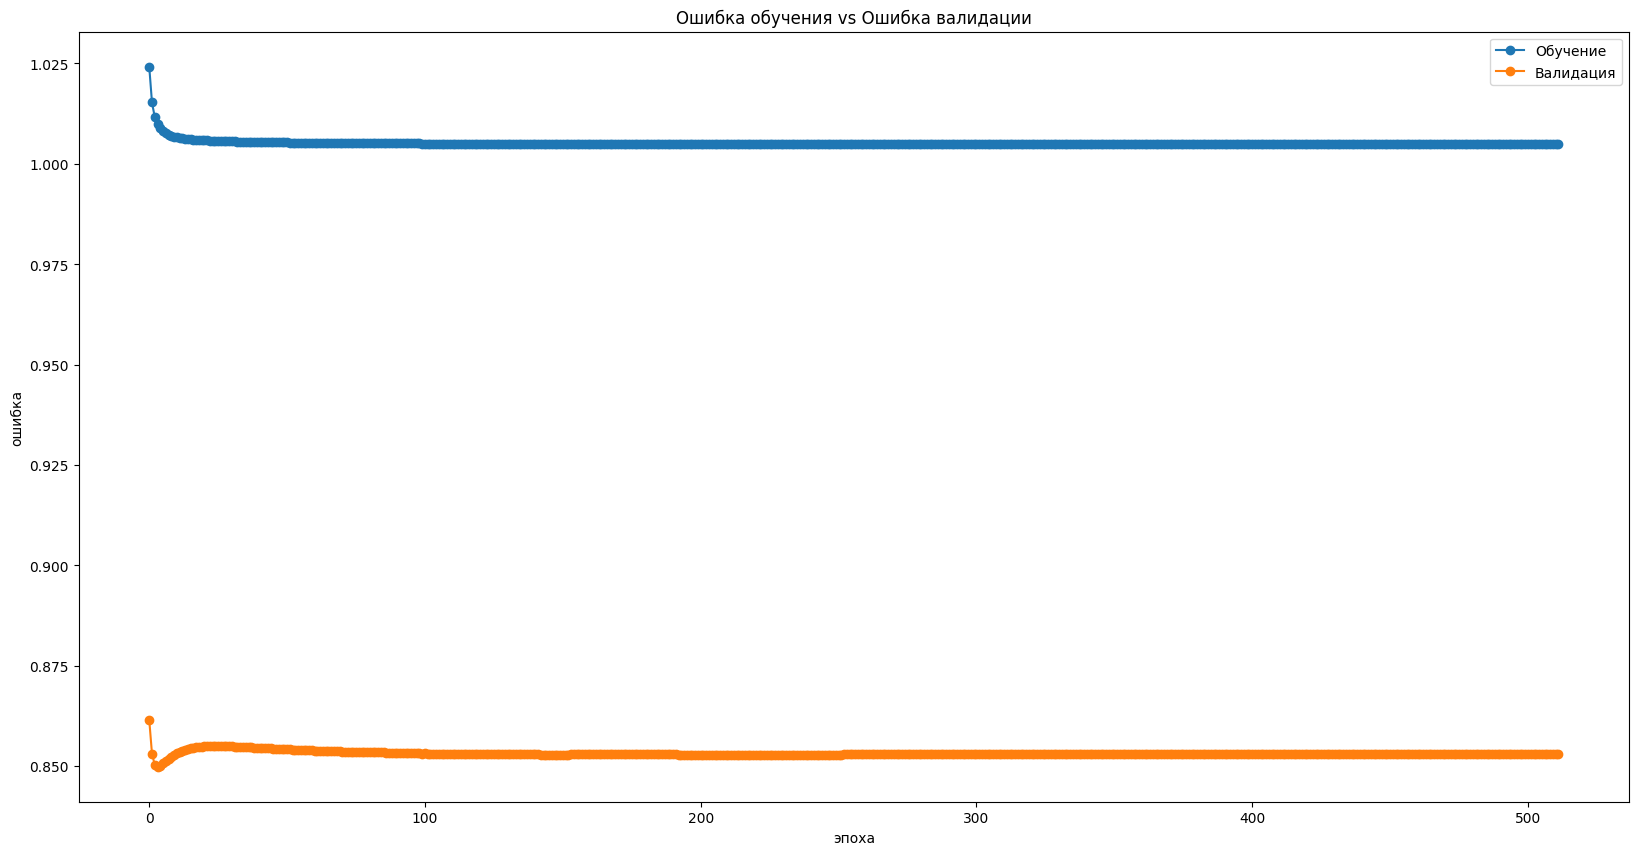

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('эпоха')
plt.ylabel('ошибка')
plt.legend(['Обучение','Валидация'])
plt.title('Ошибка обучения vs Ошибка валидации')
plt.show()

# Итог: погрешность немаленькая конечно

In [ ]:
mean = scaled_features['charges'][0]
std = scaled_features['charges'][1]
mean

np.float64(13270.422265141257)

In [ ]:
pred = []
target = []
for data in tqdm(test_loader):
  inputs, targets=data[0].to(device),data[1].to(device)
  outputs=model(inputs)
  pred.append(outputs.to('cpu').detach().numpy()* std + mean)
  target.append(targets.to('cpu').detach().numpy()* std + mean)

100%|██████████| 9/9 [00:00<00:00, 643.19it/s]


In [ ]:
for i in range(len(pred)):
  print(len(pred[i]))

32
32
32
32
32
32
32
32
12


In [ ]:
pred=np.array(pred[:8]).flatten()
target=np.array(target[:8]).flatten()
pred[2], target[2]

(np.float64(13618.203972904928), np.float64(29330.983788578757))

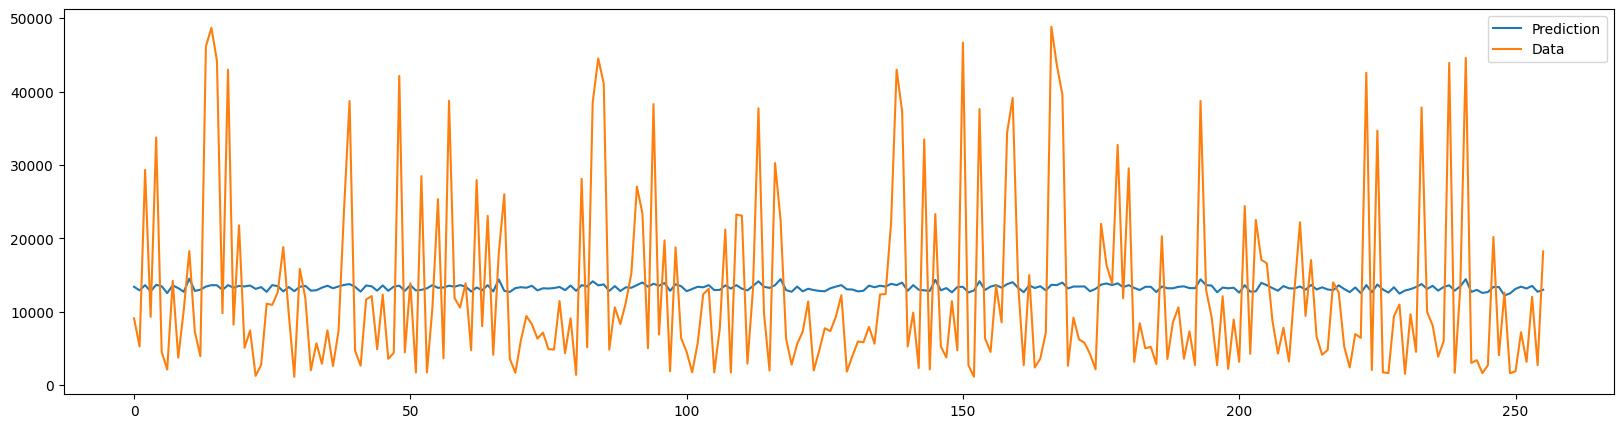

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(pred, label='Prediction')
ax.plot(target, label='Data')
ax.legend()

# Выводы: поскольку распределение данных далеко от нормального, сеть сглаживает пики, что приводит к достаточно большой ошибке